## Eq 38 <a id="ref_2.1"></a>

# Test Calculation

In [611]:
%reset -f
import math
import numpy as np
import pandas as pd
# from statistics import mean
# ================
import matplotlib.pyplot as plt
import seaborn as sns

In [612]:
# variable in  in [ev]
# --------------------

boltz   = 8.6173e-5     #  eV/Kelvin
planck  = 4.1357e-15    #  eV.s
tempe   = 298.15        #  Kelvin
from scipy.constants import e


In [613]:
e

1.602176634e-19

In [614]:
U = np.array([0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20])


Delta_G_TD  = np.array([0.40])  

# Note: these values will be recoed oppositely in the datafame, I choose to write HOR
G1_hash_array = np.array([0.80])  
G2_hash_array = np.array([0.70]) 

# G1_hash_array = np.array([0.7,0.75,0.8])  
# G2_hash_array = np.array([0.7,0.75,0.8])  

alpha1 = np.array([0.5])            
alpha2 = np.array([0.5])            

Gamma_act   = np.array([5*math.pow(10, 14)])

tem_kb = boltz * tempe 

In [615]:
print(tem_kb)

0.02569247995


In [616]:
Gamma_act

array([5.e+14])

In [617]:
print(U)
print(Gamma_act)

[0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13 0.14 0.15 0.16
 0.17 0.18 0.19 0.2 ]
[5.e+14]


In [618]:
len(U) * len(G1_hash_array) * len(G2_hash_array)

18

In [619]:
tafel = np.empty((0, 9), float)   # 0,8 Column array

for u1 in range(len(U)):
    for g1 in range(len(G1_hash_array)):
        for g2 in range(len(G2_hash_array)):
            for gTD in range(len(Delta_G_TD)):
                for al1 in range(len(alpha1)):
                    for al2 in range(len(alpha2)):
                        for gam in range(len(Gamma_act)):
                                
                                # HER
                                # ----
                                # ----
                                
                                # defining g1_hash, g2_hash, Delta_G_TD for HER
                                # ---------------------------------------------
                                g1_hash = G1_hash_array[g1]
                                g2_hash = G2_hash_array[g2]
                                dg_TD   = Delta_G_TD[gTD]
                                u  = U[u1]
                                
                        
                                # tem_kb = boltz * tempe    already defined above once
                                # ----------------------------------------------------
                                locally_cons =  (2 * tem_kb * e * Gamma_act[gam]) / planck 
                                
                                
                                # J__HER
                                # ----
                                
                                A = np.exp ( (g1_hash - alpha1[al1] * u) / tem_kb  )
                                B = np.exp ( (g2_hash - (1+alpha2[al2]) * u) / tem_kb )
                                
                                
                
                                j__HER =   (-1 * locally_cons) / (A + B)
                                
                    
                    
                                # delete HER local variables
                                # -----------------------
                                del g1_hash 
                                del g2_hash
                                del dg_TD  
                            
                                del A; del B;   
                    
                    
                                # ====================================================================================================================================
                                # ====================================================================================================================================
                                # ====================================================================================================================================
                    
                    
                    
                                # HOR
                                # ----
                                # ----

                                # defining g1_hash, g2_hash, Delta_G_TD for HOR      WORK WORK WORK WORK.....
                                # ---------------------------------------------
                                g1_hash = G2_hash_array[g2]
                                g2_hash = G1_hash_array[g1]
                                dg_TD   = -Delta_G_TD[gTD] 
                                u  = U[u1]
                                
        
                                
                                # J__HOR
                                # ----
                                A = np.exp ( (g1_hash - alpha1[al1] * u) / tem_kb  )
                                B = np.exp ( (g2_hash - (1+alpha2[al2]) * u) / tem_kb )
                                
                
                                j__HOR =   (1 * locally_cons) / (A + B)
                    
                    
                    
                    
                                tafel = np.append(tafel, np.array([[u,alpha1[al1],alpha2[al2],Gamma_act[gam],dg_TD,g1_hash,g2_hash,j__HER,j__HOR]]), axis = 0   )
                    
                    
                                # delete HER local variables
                                # -----------------------
                                del g1_hash 
                                del g2_hash
                                del dg_TD  
                            
                                del A; del B; 

In [620]:
if "df1" in globals():
    del df1
    
df1 = pd.DataFrame(tafel, columns = ['U (V)','alpha1 (eV)','alpha2 (eV)','Gamma_act (#/cm2)','Delta_TD (eV)', 'G1_hash HOR (eV)','G2_hash HOR (eV)','j_her (A/cm2)','j_hor (A/cm2)'])


decimals = 8    
df1['U (V)']             =   df1['U (V)'].apply(lambda x: round(x, decimals)) 
df1['alpha1 (eV)']       =   df1['alpha1 (eV)'].apply(lambda x: round(x, decimals))
df1['alpha2 (eV)']       =   df1['alpha2 (eV)'].apply(lambda x: round(x, decimals))
df1['Delta_TD (eV)']     =   df1['Delta_TD (eV)'].apply(lambda x: round(x, decimals))
df1['G1_hash HOR (eV)']  =   df1['G1_hash HOR (eV)'].apply(lambda x: round(x, decimals))
df1['G2_hash HOR (eV)']  =   df1['G2_hash HOR (eV)'].apply(lambda x: round(x, decimals))
df1['j_her (A/cm2)']    =   df1['j_her (A/cm2)'].apply(lambda x: round(x, decimals+1))
df1['j_hor (A/cm2)']    =   df1['j_hor (A/cm2)'].apply(lambda x: round(x, decimals+1))


# convert_dict = {i:float for i in df2.columns if i != 'GDS_OER'}
# df2 = df2.astype(convert_dict)

In [621]:
# Taking the log values
# ----------------------
df1["log j_hor"] = np.log10(df1["j_hor (A/cm2)"])
df1["log j_her"] = np.log10(-df1["j_her (A/cm2)"])

In [622]:
df1

,U (V),alpha1 (eV),alpha2 (eV),Gamma_act (#/cm2),Delta_TD (eV),G1_hash HOR (eV),G2_hash HOR (eV),j_her (A/cm2),j_hor (A/cm2),log j_hor,log j_her
0,0.03,0.5,0.5,5.000000e+14,-0.4,0.7,0.8,-0.000053,0.000162,-3.791809,-4.274080
1,0.04,0.5,0.5,5.000000e+14,-0.4,0.7,0.8,-0.000065,0.000281,-3.550790,-4.188673
2,0.05,0.5,0.5,5.000000e+14,-0.4,0.7,0.8,-0.000079,0.000484,-3.315098,-4.103556
3,0.06,0.5,0.5,5.000000e+14,-0.4,0.7,0.8,-0.000096,0.000819,-3.086633,-4.018634
4,0.07,0.5,0.5,5.000000e+14,-0.4,0.7,0.8,-0.000116,0.001356,-2.867644,-3.933838
5,0.08,0.5,0.5,5.000000e+14,-0.4,0.7,0.8,-0.000142,0.002185,-2.660548,-3.849136
6,0.09,0.5,0.5,5.000000e+14,-0.4,0.7,0.8,-0.000172,0.003407,-2.467587,-3.764489
7,0.10,0.5,0.5,5.000000e+14,-0.4,0.7,0.8,-0.000209,0.005124,-2.290379,-3.679887
8,0.11,0.5,0.5,5.000000e+14,-0.4,0.7,0.8,-0.000254,0.007421,-2.129516,-3.595310
9,0.12,0.5,0.5,5.000000e+14,-0.4,0.7,0.8,-0.000308,0.010366,-1.984405,-3.510753


In [625]:
df1["G1_hash HOR (eV)"].unique()

array([0.7])

Text(0.5, 0, 'current density log(j), [A/cm2]')

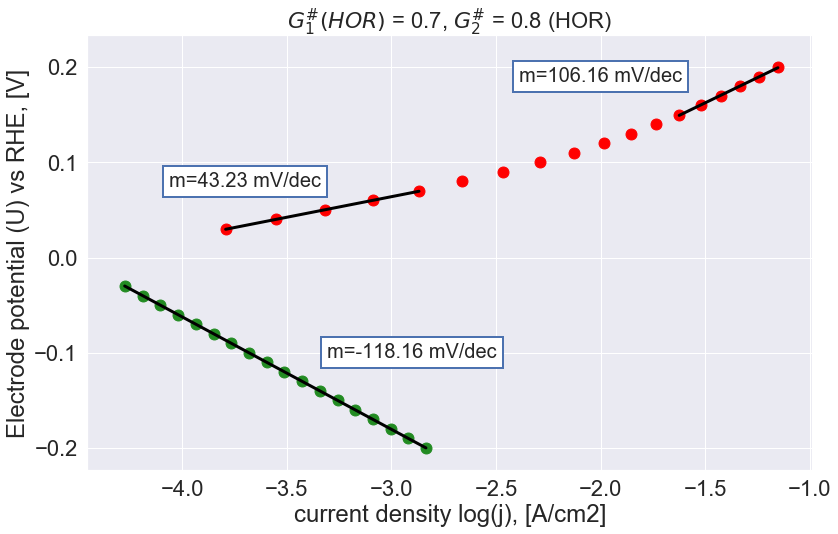

In [631]:
sns.set_style("darkgrid")
sns.set(font_scale=2)
plt.subplots(figsize=(13, 8))


plt.scatter(df1["log j_hor"],df1["U (V)"],color = "red",alpha = 1.0, s = 120)

m_hor_1, c_hor_1 = np.polyfit(df1["log j_hor"][0:5], df1["U (V)"][0:5], 1)
yfit_hor_1 = [c_hor_1 + m_hor_1 * xi for xi in df1["log j_hor"][0:5]]
plt.plot(df1["log j_hor"][0:5],yfit_hor_1, color = "black", linewidth = 3)



m_hor_2, c_hor_2 = np.polyfit(df1["log j_hor"][12:18], df1["U (V)"][12:18], 1)
yfit_hor_2 = [c_hor_2 + m_hor_2 * xi for xi in df1["log j_hor"][12:18]]
plt.plot(df1["log j_hor"][12:18],yfit_hor_2, color = "black", linewidth = 3)


x = 1000
plt.text(
    -3.7, 0.08, f"m={m_hor_1*1000:.2f} mV/dec", ha="center", va="center", rotation=0, size=20,
    bbox=dict(boxstyle="square,pad=0.3", fc="white", ec="b", lw=2))

plt.text(
    -2, 0.19, f"m={m_hor_2*1000:.2f} mV/dec", ha="center", va="center", rotation=0, size=20,
    bbox=dict(boxstyle="square,pad=0.3", fc="white", ec="b", lw=2))



# main HER plotting
plt.scatter(df1["log j_her"],-df1["U (V)"],color = "forestgreen", s = 120)

# evaluation of slode
m_her, c_her = np.polyfit(df1["log j_her"], -df1["U (V)"], 1)
yfit_her = [c_her + m_her * xi for xi in df1["log j_her"]]
plt.plot(df1["log j_her"],yfit_her, color = "black", alpha = 1.0, linewidth = 3)



plt.text(
    -2.9, -0.10, f"m={m_her*1000:.2f} mV/dec", ha="center", va="center", rotation=0, size=20,
    bbox=dict(boxstyle="square,pad=0.3", fc="white", ec="b", lw=2))

x = df1["G1_hash HOR (eV)"].unique()[0] 
y = df1["G2_hash HOR (eV)"].unique()[0]
plt.title(f"$G_1^\# (HOR)$ = {x}, $G_2^\#$ = {y} (HOR)", fontsize = 22)
plt.ylabel('Electrode potential (U) vs RHE, [V]')
plt.xlabel('current density log(j), [A/cm2]')

In [560]:
m_her, b_her = np.polyfit(df1["log j_her"], df1["U (V)"], 1) 
print(m_her,b_her)

0.1181604289727737 0.53487155585492


In [451]:
m, b = np.polyfit(df1["log j_hor"][0:4], df1["U (V)"][0:4], 1) 
print(m,b)

0.04252506173287135 0.19111962334333676


# Three irredicuble cases

In [850]:
%reset -f
import math
import numpy as np
import pandas as pd
# from statistics import mean
# ================
import matplotlib.pyplot as plt
import seaborn as sns

In [851]:
# variable in  in [ev]
# --------------------

boltz   = 8.6173e-5     #  eV/Kelvin
planck  = 4.1357e-15    #  eV.s
tempe   = 298.15        #  Kelvin
from scipy.constants import e


In [852]:
e

1.602176634e-19

In [853]:
U = np.array([0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20])


Delta_G_TD  = np.array([0.40])  

# Note: these values will be recoed oppositely in the datafame, I choose to write HOR
G1_hash_array = np.array([0.70,0.75,0.80])  
G2_hash_array = np.array([0.70]) 

# G1_hash_array = np.array([0.7,0.75,0.8])  
# G2_hash_array = np.array([0.7,0.75,0.8])  

alpha1 = np.array([0.5])            
alpha2 = np.array([0.5])            

Gamma_act   = np.array([5*math.pow(10, 14)])

tem_kb = boltz * tempe 

In [854]:
print(tem_kb)

0.02569247995


In [855]:
Gamma_act

array([5.e+14])

In [856]:
print(U)
print(Gamma_act)

[0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13 0.14 0.15 0.16
 0.17 0.18 0.19 0.2 ]
[5.e+14]


In [857]:
len(U) * len(G1_hash_array) * len(G2_hash_array)

54

In [858]:
tafel = np.empty((0, 9), float)   # 0,8 Column array

for u1 in range(len(U)):
    for g1 in range(len(G1_hash_array)):
        for g2 in range(len(G2_hash_array)):
            for gTD in range(len(Delta_G_TD)):
                for al1 in range(len(alpha1)):
                    for al2 in range(len(alpha2)):
                        for gam in range(len(Gamma_act)):
                                
                                # HER
                                # ----
                                # ----
                                
                                # defining g1_hash, g2_hash, Delta_G_TD for HER
                                # ---------------------------------------------
                                g1_hash = G1_hash_array[g1]
                                g2_hash = G2_hash_array[g2]
                                dg_TD   = Delta_G_TD[gTD]
                                u  = U[u1]
                                
                        
                                # tem_kb = boltz * tempe    already defined above once
                                # ----------------------------------------------------
                                locally_cons =  (2 * tem_kb * e * Gamma_act[gam]) / planck 
                                
                                
                                # J__HER
                                # ----
                                
                                A = np.exp ( (g1_hash - alpha1[al1] * u) / tem_kb  )
                                B = np.exp ( (g2_hash - (1+alpha2[al2]) * u) / tem_kb )
                                
                                
                
                                j__HER =   (-1 * locally_cons) / (A + B)
                                
                    
                    
                                # delete HER local variables
                                # -----------------------
                                del g1_hash 
                                del g2_hash
                                del dg_TD  
                            
                                del A; del B;   
                    
                    
                                # ====================================================================================================================================
                                # ====================================================================================================================================
                                # ====================================================================================================================================
                    
                    
                    
                                # HOR
                                # ----
                                # ----

                                # defining g1_hash, g2_hash, Delta_G_TD for HOR      WORK WORK WORK WORK.....
                                # ---------------------------------------------
                                g1_hash = G2_hash_array[g2]
                                g2_hash = G1_hash_array[g1]
                                dg_TD   = -Delta_G_TD[gTD] 
                                u  = U[u1]
                                
        
                                
                                # J__HOR
                                # ----
                                A = np.exp ( (g1_hash - alpha1[al1] * u) / tem_kb  )
                                B = np.exp ( (g2_hash - (1+alpha2[al2]) * u) / tem_kb )
                                
                
                                j__HOR =   (1 * locally_cons) / (A + B)
                    
                    
                    
                    
                                tafel = np.append(tafel, np.array([[u,alpha1[al1],alpha2[al2],Gamma_act[gam],dg_TD,g1_hash,g2_hash,j__HER,j__HOR]]), axis = 0   )
                    
                    
                                # delete HER local variables
                                # -----------------------
                                del g1_hash 
                                del g2_hash
                                del dg_TD  
                            
                                del A; del B; 

In [859]:
if "df" in globals():
    del df
    
df = pd.DataFrame(tafel, columns = ['U (V)','alpha1 (eV)','alpha2 (eV)','Gamma_act (#/cm2)','Delta_TD (eV)', 'G1_hash HOR (eV)','G2_hash HOR (eV)','j_her (A/cm2)','j_hor (A/cm2)'])


decimals = 8    
df['U (V)']             =   df['U (V)'].apply(lambda x: round(x, decimals)) 
df['alpha1 (eV)']       =   df['alpha1 (eV)'].apply(lambda x: round(x, decimals))
df['alpha2 (eV)']       =   df['alpha2 (eV)'].apply(lambda x: round(x, decimals))
df['Delta_TD (eV)']     =   df['Delta_TD (eV)'].apply(lambda x: round(x, decimals))
df['G1_hash HOR (eV)']  =   df['G1_hash HOR (eV)'].apply(lambda x: round(x, decimals))
df['G2_hash HOR (eV)']  =   df['G2_hash HOR (eV)'].apply(lambda x: round(x, decimals))
df['j_her (A/cm2)']    =   df['j_her (A/cm2)'].apply(lambda x: round(x, decimals+1))
df['j_hor (A/cm2)']    =   df['j_hor (A/cm2)'].apply(lambda x: round(x, decimals+1))


# convert_dict = {i:float for i in df2.columns if i != 'GDS_OER'}
# df2 = df2.astype(convert_dict)

In [860]:
# Taking the log values
# ----------------------
df["log j_hor"] = np.log10(df["j_hor (A/cm2)"])
df["log j_her"] = np.log10(-df["j_her (A/cm2)"])

In [861]:
df[0:10]

,U (V),alpha1 (eV),alpha2 (eV),Gamma_act (#/cm2),Delta_TD (eV),G1_hash HOR (eV),G2_hash HOR (eV),j_her (A/cm2),j_hor (A/cm2),log j_hor,log j_her
0,0.03,0.5,0.5,5.000000e+14,-0.4,0.7,0.70,-0.002002,0.002002,-2.698608,-2.698608
1,0.03,0.5,0.5,5.000000e+14,-0.4,0.7,0.75,-0.000359,0.000826,-3.083137,-3.445034
2,0.03,0.5,0.5,5.000000e+14,-0.4,0.7,0.80,-0.000053,0.000162,-3.791809,-4.274080
3,0.04,0.5,0.5,5.000000e+14,-0.4,0.7,0.70,-0.002633,0.002633,-2.579526,-2.579526
4,0.04,0.5,0.5,5.000000e+14,-0.4,0.7,0.75,-0.000442,0.001288,-2.890177,-3.354517
5,0.04,0.5,0.5,5.000000e+14,-0.4,0.7,0.80,-0.000065,0.000281,-3.550790,-4.188673
6,0.05,0.5,0.5,5.000000e+14,-0.4,0.7,0.70,-0.003389,0.003389,-2.469920,-2.469920
7,0.05,0.5,0.5,5.000000e+14,-0.4,0.7,0.75,-0.000542,0.001937,-2.712968,-3.265887
8,0.05,0.5,0.5,5.000000e+14,-0.4,0.7,0.80,-0.000079,0.000484,-3.315098,-4.103556
9,0.06,0.5,0.5,5.000000e+14,-0.4,0.7,0.70,-0.004290,0.004290,-2.367540,-2.367540


In [862]:
df["G1_hash HOR (eV)"].unique()

array([0.7])

In [863]:
# df[df["G1_hash HOR (eV)"] == 0.70 && df["G2_hash HOR (eV)"] == 0.80]

m1 = df["G1_hash HOR (eV)"] == 0.70
m2 = df["G2_hash HOR (eV)"] == 0.70


df1 = df[m1 & m2]

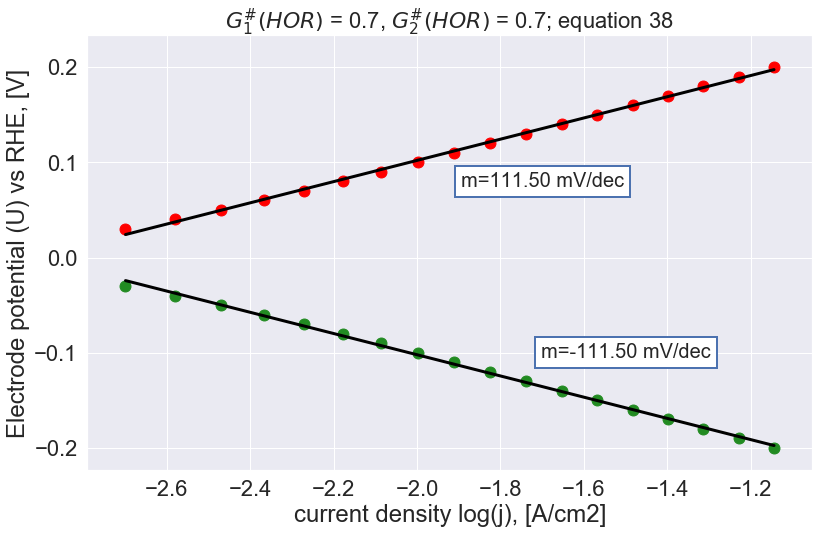

In [866]:
sns.set_style("darkgrid")
sns.set(font_scale=2)
plt.subplots(figsize=(13, 8))


plt.scatter(df1["log j_hor"],df1["U (V)"],color = "red",alpha = 1.0, s = 120)

m_hor_1, c_hor_1 = np.polyfit(df1["log j_hor"], df1["U (V)"], 1)
yfit_hor_1 = [c_hor_1 + m_hor_1 * xi for xi in df1["log j_hor"]]
plt.plot(df1["log j_hor"],yfit_hor_1, color = "black", linewidth = 3)



x = 1000
plt.text(
    -1.7, 0.08, f"m={m_hor_1*1000:.2f} mV/dec", ha="center", va="center", rotation=0, size=20,
    bbox=dict(boxstyle="square,pad=0.3", fc="white", ec="b", lw=2))





# main HER plotting
plt.scatter(df1["log j_her"],-df1["U (V)"],color = "forestgreen", s = 120)

# evaluation of slode
m_her, c_her = np.polyfit(df1["log j_her"], -df1["U (V)"], 1)
yfit_her = [c_her + m_her * xi for xi in df1["log j_her"]]
plt.plot(df1["log j_her"],yfit_her, color = "black", alpha = 1.0, linewidth = 3)



plt.text(
    -1.5, -0.10, f"m={m_her*1000:.2f} mV/dec", ha="center", va="center", rotation=0, size=20,
    bbox=dict(boxstyle="square,pad=0.3", fc="white", ec="b", lw=2))

x = df1["G1_hash HOR (eV)"].unique()[0] 
y = df1["G2_hash HOR (eV)"].unique()[0]
plt.title(f"$G_1^\# (HOR)$ = {x}, $G_2^\# (HOR) $ = {y}; equation 38", fontsize = 22)
plt.ylabel('Electrode potential (U) vs RHE, [V]')
plt.xlabel('current density log(j), [A/cm2]')
plt.savefig('case_1.png', dpi = 1000)

In [867]:
if "df1" in globals():
    del df1

#### ===============================

In [868]:
# df[df["G1_hash HOR (eV)"] == 0.70 && df["G2_hash HOR (eV)"] == 0.80]

m1 = df["G1_hash HOR (eV)"] == 0.70
m2 = df["G2_hash HOR (eV)"] == 0.75


df1 = df[m1 & m2]

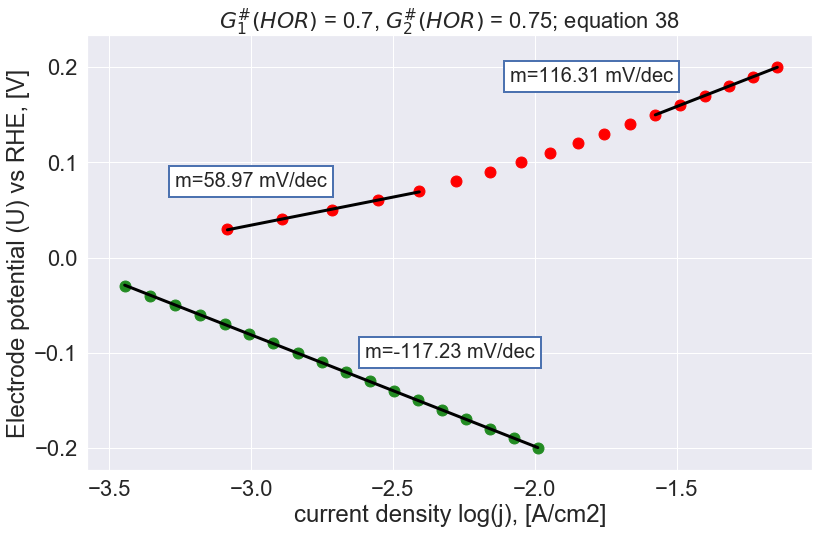

In [869]:
sns.set_style("darkgrid")
sns.set(font_scale=2)
plt.subplots(figsize=(13, 8))


plt.scatter(df1["log j_hor"],df1["U (V)"],color = "red",alpha = 1.0, s = 120)

m_hor_1, c_hor_1 = np.polyfit(df1["log j_hor"][0:5], df1["U (V)"][0:5], 1)
yfit_hor_1 = [c_hor_1 + m_hor_1 * xi for xi in df1["log j_hor"][0:5]]
plt.plot(df1["log j_hor"][0:5],yfit_hor_1, color = "black", linewidth = 3)



m_hor_2, c_hor_2 = np.polyfit(df1["log j_hor"][12:18], df1["U (V)"][12:18], 1)
yfit_hor_2 = [c_hor_2 + m_hor_2 * xi for xi in df1["log j_hor"][12:18]]
plt.plot(df1["log j_hor"][12:18],yfit_hor_2, color = "black", linewidth = 3)


x = 1000
plt.text(
    -3, 0.08, f"m={m_hor_1*1000:.2f} mV/dec", ha="center", va="center", rotation=0, size=20,
    bbox=dict(boxstyle="square,pad=0.3", fc="white", ec="b", lw=2))

plt.text(
    -1.8, 0.19, f"m={m_hor_2*1000:.2f} mV/dec", ha="center", va="center", rotation=0, size=20,
    bbox=dict(boxstyle="square,pad=0.3", fc="white", ec="b", lw=2))



# main HER plotting
plt.scatter(df1["log j_her"],-df1["U (V)"],color = "forestgreen", s = 120)

# evaluation of slode
m_her, c_her = np.polyfit(df1["log j_her"], -df1["U (V)"], 1)
yfit_her = [c_her + m_her * xi for xi in df1["log j_her"]]
plt.plot(df1["log j_her"],yfit_her, color = "black", alpha = 1.0, linewidth = 3)



plt.text(
    -2.3, -0.10, f"m={m_her*1000:.2f} mV/dec", ha="center", va="center", rotation=0, size=20,
    bbox=dict(boxstyle="square,pad=0.3", fc="white", ec="b", lw=2))

x = df1["G1_hash HOR (eV)"].unique()[0] 
y = df1["G2_hash HOR (eV)"].unique()[0]
plt.title(f"$G_1^\# (HOR)$ = {x}, $G_2^\# (HOR) $ = {y}; equation 38", fontsize = 22)
plt.ylabel('Electrode potential (U) vs RHE, [V]')
plt.xlabel('current density log(j), [A/cm2]')
plt.savefig('case_2.png', dpi = 1000)

In [870]:
if "df1" in globals():
    del df1

#### ===============================

In [872]:
# df[df["G1_hash HOR (eV)"] == 0.70 && df["G2_hash HOR (eV)"] == 0.80]

m1 = df["G1_hash HOR (eV)"] == 0.70
m2 = df["G2_hash HOR (eV)"] == 0.80


df1 = df[m1 & m2]

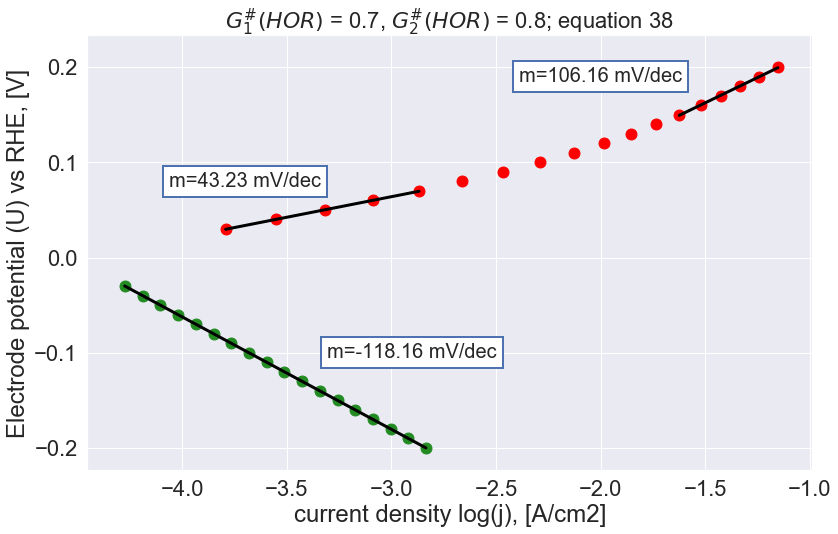

In [873]:
sns.set_style("darkgrid")
sns.set(font_scale=2)
plt.subplots(figsize=(13, 8))


plt.scatter(df1["log j_hor"],df1["U (V)"],color = "red",alpha = 1.0, s = 120)

m_hor_1, c_hor_1 = np.polyfit(df1["log j_hor"][0:5], df1["U (V)"][0:5], 1)
yfit_hor_1 = [c_hor_1 + m_hor_1 * xi for xi in df1["log j_hor"][0:5]]
plt.plot(df1["log j_hor"][0:5],yfit_hor_1, color = "black", linewidth = 3)



m_hor_2, c_hor_2 = np.polyfit(df1["log j_hor"][12:18], df1["U (V)"][12:18], 1)
yfit_hor_2 = [c_hor_2 + m_hor_2 * xi for xi in df1["log j_hor"][12:18]]
plt.plot(df1["log j_hor"][12:18],yfit_hor_2, color = "black", linewidth = 3)


x = 1000
plt.text(
    -3.7, 0.08, f"m={m_hor_1*1000:.2f} mV/dec", ha="center", va="center", rotation=0, size=20,
    bbox=dict(boxstyle="square,pad=0.3", fc="white", ec="b", lw=2))

plt.text(
    -2, 0.19, f"m={m_hor_2*1000:.2f} mV/dec", ha="center", va="center", rotation=0, size=20,
    bbox=dict(boxstyle="square,pad=0.3", fc="white", ec="b", lw=2))



# main HER plotting
plt.scatter(df1["log j_her"],-df1["U (V)"],color = "forestgreen", s = 120)

# evaluation of slode
m_her, c_her = np.polyfit(df1["log j_her"], -df1["U (V)"], 1)
yfit_her = [c_her + m_her * xi for xi in df1["log j_her"]]
plt.plot(df1["log j_her"],yfit_her, color = "black", alpha = 1.0, linewidth = 3)



plt.text(
    -2.9, -0.10, f"m={m_her*1000:.2f} mV/dec", ha="center", va="center", rotation=0, size=20,
    bbox=dict(boxstyle="square,pad=0.3", fc="white", ec="b", lw=2))

x = df1["G1_hash HOR (eV)"].unique()[0] 
y = df1["G2_hash HOR (eV)"].unique()[0]
plt.title(f"$G_1^\# (HOR)$ = {x}, $G_2^\# (HOR) $ = {y}; equation 38", fontsize = 22)
plt.ylabel('Electrode potential (U) vs RHE, [V]')
plt.xlabel('current density log(j), [A/cm2]')
plt.savefig('case_3.png', dpi = 1000)

In [560]:
m_her, b_her = np.polyfit(df1["log j_her"], df1["U (V)"], 1) 
print(m_her,b_her)

0.1181604289727737 0.53487155585492


In [451]:
m, b = np.polyfit(df1["log j_hor"][0:4], df1["U (V)"][0:4], 1) 
print(m,b)

0.04252506173287135 0.19111962334333676


In [ ]:
if "df1" in globals():
    del df1

#### ===============================

## Eq 52 <a id="ref_2.1"></a>

In [76]:
%reset -f
import math
import numpy as np
import pandas as pd
# from statistics import mean
# ================
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
# variable in  in [ev]
# --------------------

boltz   = 8.6173e-5     #  eV/Kelvin
planck  = 4.1357e-15    #  eV.s
tempe   = 298.15        #  Kelvin
from scipy.constants import e


In [78]:
e

1.602176634e-19

In [79]:
# U = np.array([0.04,0.05,0.06,0.07,0.08,0.09,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20])


U = np.array([0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20])


Delta_G_TD  = np.array([0.40,0.30,0.20,0.10,0])  

# Note: these values will be recoed oppositely in the datafame, I choose to write HOR
G1_hash_array = np.array([0.70,0.75,0.80])  
G2_hash_array = np.array([0.70]) 

# G1_hash_array = np.array([0.7,0.75,0.8])  
# G2_hash_array = np.array([0.7,0.75,0.8])  

alpha1 = np.array([0.5])            
alpha2 = np.array([0.5])            

Gamma_act   = np.array([5*math.pow(10, 14)])

tem_kb = boltz * tempe 

In [80]:
print(tem_kb)

0.02569247995


In [81]:
print(U)
print(Gamma_act)

[0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13 0.14 0.15 0.16
 0.17 0.18 0.19 0.2 ]
[5.e+14]


In [82]:
len(U) * len(G1_hash_array) * len(G2_hash_array)

54

In [83]:
tafel = np.empty((0, 9), float)   # 0,8 Column array

for u1 in range(len(U)):
    for g1 in range(len(G1_hash_array)):
        for g2 in range(len(G2_hash_array)):
            for gTD in range(len(Delta_G_TD)):
                for al1 in range(len(alpha1)):
                    for al2 in range(len(alpha2)):
                        for gam in range(len(Gamma_act)):
                                
                                # HER
                                # ----
                                # ----
                                
                                # defining g1_hash, g2_hash, Delta_G_TD for HER
                                # ---------------------------------------------
                                g1_hash = G1_hash_array[g1]
                                g2_hash = G2_hash_array[g2]
                                dg_TD   = Delta_G_TD[gTD]
                                u  = U[u1]
                                
                        
                                # tem_kb = boltz * tempe    already defined above once
                                # ----------------------------------------------------
                                locally_cons =  (2 * tem_kb * e * Gamma_act[gam]) / planck 
                                
                                
                                # J__HER
                                # ----
                                A = np.exp( ( (alpha1[al1]+alpha2[al2]) * u ) / tem_kb )
                                
                                B = np.exp( (g1_hash + (alpha2[al2] * u ) )   / tem_kb  )
                                C = np.exp( (g2_hash - (1-alpha1[al1]) * u) / tem_kb  )
                                D = np.exp( (g2_hash  - dg_TD  + (alpha1[al1] * u) ) / tem_kb  )
                                
                
                                j__HER =   (-1 *locally_cons * A) / (B + C + D)
                    
                    
                                # delete HER local variables
                                # -----------------------
                                del g1_hash 
                                del g2_hash
                                del dg_TD  
                            
                                del A; del B; del C; del D; del u  
                    
                    
                                # ====================================================================================================================================
                                # ====================================================================================================================================
                                # ====================================================================================================================================
                    
                    
                    
                                # HOR
                                # ----
                                # ----

                                # defining g1_hash, g2_hash, Delta_G_TD for HOR      WORK WORK WORK WORK.....
                                # ---------------------------------------------
                                g1_hash = G2_hash_array[g2]
                                g2_hash = G1_hash_array[g1]
                                dg_TD   = Delta_G_TD[gTD] 
                                u  = U[u1]
                                
        
                                
                                # J__HOR
                                # ----
                                A = np.exp( ( (alpha1[al1]+alpha2[al2]) * u ) / tem_kb )
                                
                                B = np.exp( (g1_hash + (alpha2[al2] * u ) )   / tem_kb  )
                                C = np.exp( (g2_hash - (1-alpha1[al1]) * u ) / tem_kb  )
                                D = np.exp( (g2_hash  - dg_TD  + (alpha1[al1] * u) ) / tem_kb  )
                                
                
                                j__HOR =   (1 *locally_cons * A) / (B + C + D)
                    
                    
                    
                    
                                tafel = np.append(tafel, np.array([[u,alpha1[al1],alpha2[al2],Gamma_act[gam],dg_TD,g1_hash,g2_hash,j__HER,j__HOR]]), axis = 0   )
                    
                    
                                # delete HER local variables
                                # -----------------------
                                del g1_hash 
                                del g2_hash
                                del dg_TD  
                            
                                del A; del B; del C; del D;

In [84]:
if "df" in globals():
    del df
    
df = pd.DataFrame(tafel, columns = ['U (V)','alpha1 (eV)','alpha2 (eV)','Gamma_act (#/cm2)','Delta_TD (eV)', 'G1_hash HOR (eV)','G2_hash HOR (eV)','j_her (uA/cm2)','j_hor (uA/cm2)'])


decimals = 8    
df['U (V)']             =   df['U (V)'].apply(lambda x: round(x, decimals)) 
df['alpha1 (eV)']       =   df['alpha1 (eV)'].apply(lambda x: round(x, decimals))
df['alpha2 (eV)']       =   df['alpha1 (eV)'].apply(lambda x: round(x, decimals))
df['Delta_TD (eV)']     =   df['Delta_TD (eV)'].apply(lambda x: round(x, decimals))
df['G1_hash HOR (eV)']  =   df['G1_hash HOR (eV)'].apply(lambda x: round(x, decimals))
df['G2_hash HOR (eV)']  =   df['G2_hash HOR (eV)'].apply(lambda x: round(x, decimals))
df['j_her (uA/cm2)']    =   df['j_her (uA/cm2)'].apply(lambda x: round(x, decimals+1))
df['j_hor (uA/cm2)']    =   df['j_hor (uA/cm2)'].apply(lambda x: round(x, decimals+1))


# convert_dict = {i:float for i in df2.columns if i != 'GDS_OER'}
# df2 = df2.astype(convert_dict)

In [85]:
# Taking the log values
# ----------------------
df["log j_hor"] = np.log10(df["j_hor (uA/cm2)"])
df["log j_her"] = np.log10(-df["j_her (uA/cm2)"])

In [86]:
df["j_her (uA/cm2)"].any() > 0

True

In [87]:
df[0:6]

,U (V),alpha1 (eV),alpha2 (eV),Gamma_act (#/cm2),Delta_TD (eV),G1_hash HOR (eV),G2_hash HOR (eV),j_her (uA/cm2),j_hor (uA/cm2),log j_hor,log j_her
0,0.03,0.5,0.5,5.000000e+14,0.4,0.7,0.70,-0.002002,0.002002,-2.698608,-2.698608
1,0.03,0.5,0.5,5.000000e+14,0.3,0.7,0.70,-0.002002,0.002002,-2.698611,-2.698611
2,0.03,0.5,0.5,5.000000e+14,0.2,0.7,0.70,-0.002001,0.002001,-2.698746,-2.698746
3,0.03,0.5,0.5,5.000000e+14,0.1,0.7,0.70,-0.001971,0.001971,-2.705314,-2.705314
4,0.03,0.5,0.5,5.000000e+14,0.0,0.7,0.70,-0.001136,0.001136,-2.944792,-2.944792
5,0.03,0.5,0.5,5.000000e+14,0.4,0.7,0.75,-0.000359,0.000826,-3.083137,-3.445034


In [88]:
if "df1" in globals():
    del df1

In [89]:
# df[df["G1_hash HOR (eV)"] == 0.70 && df["G2_hash HOR (eV)"] == 0.80]

value = 0.40
m1 = df["Delta_TD (eV)"]    == value
m2 = df["G1_hash HOR (eV)"] == 0.70
m3 = df["G2_hash HOR (eV)"] == 0.70


df1 = df[m1 & m2 & m3]

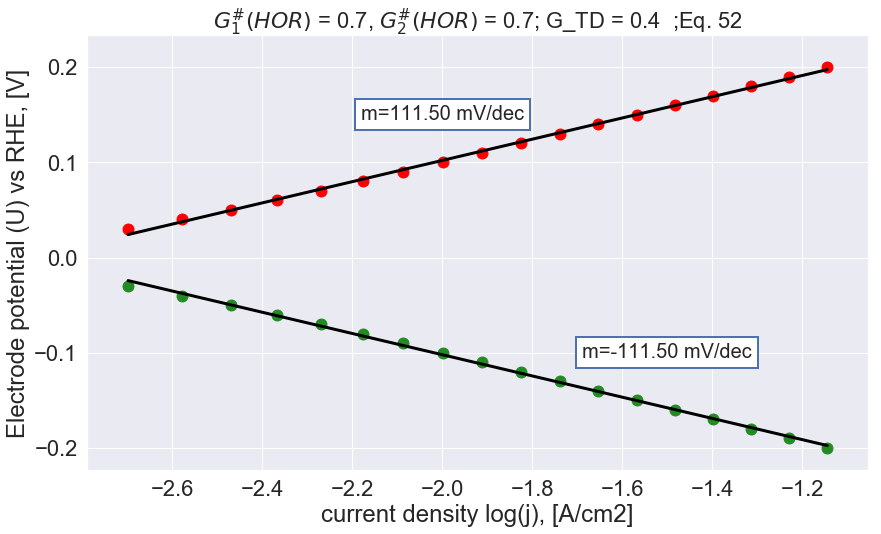

In [90]:
sns.set_style("darkgrid")
sns.set(font_scale=2)
plt.subplots(figsize=(14, 8))


plt.scatter(df1["log j_hor"],df1["U (V)"],color = "red",alpha = 1.0, s = 120)

m_hor_1, c_hor_1 = np.polyfit(df1["log j_hor"], df1["U (V)"], 1)
yfit_hor_1 = [c_hor_1 + m_hor_1 * xi for xi in df1["log j_hor"]]
plt.plot(df1["log j_hor"],yfit_hor_1, color = "black", linewidth = 3)



x = 1000
plt.text(
    -2, 0.15, f"m={m_hor_1*1000:.2f} mV/dec", ha="center", va="center", rotation=0, size=20,
    bbox=dict(boxstyle="square,pad=0.3", fc="white", ec="b", lw=2))





# main HER plotting
plt.scatter(df1["log j_her"],-df1["U (V)"],color = "forestgreen", s = 120)

# evaluation of slode
m_her, c_her = np.polyfit(df1["log j_her"], -df1["U (V)"], 1)
yfit_her = [c_her + m_her * xi for xi in df1["log j_her"]]
plt.plot(df1["log j_her"],yfit_her, color = "black", alpha = 1.0, linewidth = 3)



plt.text(
    -1.5, -0.10, f"m={m_her*1000:.2f} mV/dec", ha="center", va="center", rotation=0, size=20,
    bbox=dict(boxstyle="square,pad=0.3", fc="white", ec="b", lw=2))

x = df1["G1_hash HOR (eV)"].unique()[0] 
y = df1["G2_hash HOR (eV)"].unique()[0]
plt.title(f"$G_1^\# (HOR)$ = {x}, $G_2^\# (HOR) $ = {y}; G_TD = {value}  ;Eq. 52", fontsize = 22)
plt.ylabel('Electrode potential (U) vs RHE, [V]')
plt.xlabel('current density log(j), [A/cm2]')
plt.savefig("Delta_GTD_0.40__1.png",dpi = 1000)

In [91]:
if "df1" in globals():
    del df1

In [92]:
# df[df["G1_hash HOR (eV)"] == 0.70 && df["G2_hash HOR (eV)"] == 0.80]

value = 0.40
m1 = df["Delta_TD (eV)"]    == value
m2 = df["G1_hash HOR (eV)"] == 0.70
m3 = df["G2_hash HOR (eV)"] == 0.75


df1 = df[m1 & m2 & m3]

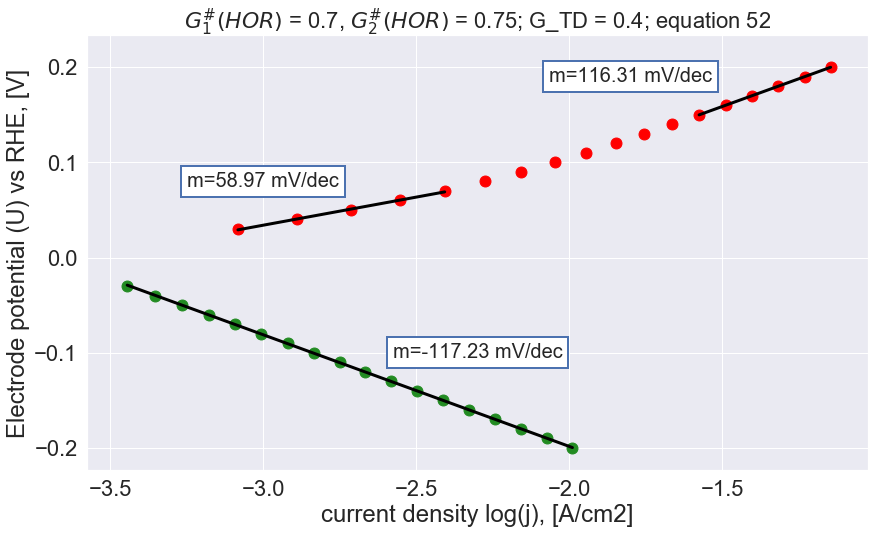

In [93]:
sns.set_style("darkgrid")
sns.set(font_scale=2)
plt.subplots(figsize=(14, 8))


plt.scatter(df1["log j_hor"],df1["U (V)"],color = "red",alpha = 1.0, s = 120)

m_hor_1, c_hor_1 = np.polyfit(df1["log j_hor"][0:5], df1["U (V)"][0:5], 1)
yfit_hor_1 = [c_hor_1 + m_hor_1 * xi for xi in df1["log j_hor"][0:5]]
plt.plot(df1["log j_hor"][0:5],yfit_hor_1, color = "black", linewidth = 3)



m_hor_2, c_hor_2 = np.polyfit(df1["log j_hor"][12:18], df1["U (V)"][12:18], 1)
yfit_hor_2 = [c_hor_2 + m_hor_2 * xi for xi in df1["log j_hor"][12:18]]
plt.plot(df1["log j_hor"][12:18],yfit_hor_2, color = "black", linewidth = 3)


x = 1000
plt.text(
    -3.0, 0.08, f"m={m_hor_1*1000:.2f} mV/dec", ha="center", va="center", rotation=0, size=20,
    bbox=dict(boxstyle="square,pad=0.3", fc="white", ec="b", lw=2))

plt.text(
    -1.8, 0.19, f"m={m_hor_2*1000:.2f} mV/dec", ha="center", va="center", rotation=0, size=20,
    bbox=dict(boxstyle="square,pad=0.3", fc="white", ec="b", lw=2))


# =============================================================================
# =============================================================================


# main HER plotting
plt.scatter(df1["log j_her"],-df1["U (V)"],color = "forestgreen", s = 120)

# evaluation of slode
m_her, c_her = np.polyfit(df1["log j_her"], -df1["U (V)"], 1)
yfit_her = [c_her + m_her * xi for xi in df1["log j_her"]]
plt.plot(df1["log j_her"],yfit_her, color = "black", alpha = 1.0, linewidth = 3)


plt.text(
    -2.3, -0.10, f"m={m_her*1000:.2f} mV/dec", ha="center", va="center", rotation=0, size=20,
    bbox=dict(boxstyle="square,pad=0.3", fc="white", ec="b", lw=2))


# General for graphics
# ====================
x = df1["G1_hash HOR (eV)"].unique()[0] 
y = df1["G2_hash HOR (eV)"].unique()[0]
plt.title(f"$G_1^\# (HOR)$ = {x}, $G_2^\# (HOR) $ = {y}; G_TD = {value}; equation 52", fontsize = 22)
plt.ylabel('Electrode potential (U) vs RHE, [V]')
plt.xlabel('current density log(j), [A/cm2]')
plt.savefig("Delta_GTD_0.40__2.png",dpi = 1000)

In [94]:
if "df1" in globals():
    del df1

In [95]:
# df[df["G1_hash HOR (eV)"] == 0.70 && df["G2_hash HOR (eV)"] == 0.80]

value = 0.40
m1 = df["Delta_TD (eV)"]    == value
m2 = df["G1_hash HOR (eV)"] == 0.70
m3 = df["G2_hash HOR (eV)"] == 0.80


df1 = df[m1 & m2 & m3]

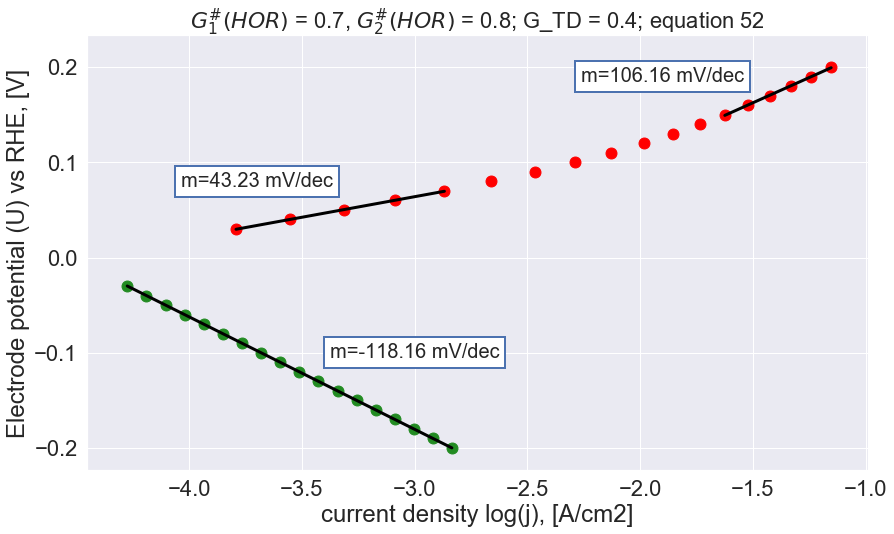

In [96]:
sns.set_style("darkgrid")
sns.set(font_scale=2)
plt.subplots(figsize=(14, 8))


plt.scatter(df1["log j_hor"],df1["U (V)"],color = "red",alpha = 1.0, s = 120)

m_hor_1, c_hor_1 = np.polyfit(df1["log j_hor"][0:5], df1["U (V)"][0:5], 1)
yfit_hor_1 = [c_hor_1 + m_hor_1 * xi for xi in df1["log j_hor"][0:5]]
plt.plot(df1["log j_hor"][0:5],yfit_hor_1, color = "black", linewidth = 3)



m_hor_2, c_hor_2 = np.polyfit(df1["log j_hor"][12:18], df1["U (V)"][12:18], 1)
yfit_hor_2 = [c_hor_2 + m_hor_2 * xi for xi in df1["log j_hor"][12:18]]
plt.plot(df1["log j_hor"][12:18],yfit_hor_2, color = "black", linewidth = 3)


x = 1000
plt.text(
    -3.7, 0.08, f"m={m_hor_1*1000:.2f} mV/dec", ha="center", va="center", rotation=0, size=20,
    bbox=dict(boxstyle="square,pad=0.3", fc="white", ec="b", lw=2))

plt.text(
    -1.9, 0.19, f"m={m_hor_2*1000:.2f} mV/dec", ha="center", va="center", rotation=0, size=20,
    bbox=dict(boxstyle="square,pad=0.3", fc="white", ec="b", lw=2))


# =============================================================================
# =============================================================================


# main HER plotting
plt.scatter(df1["log j_her"],-df1["U (V)"],color = "forestgreen", s = 120)

# evaluation of slode
m_her, c_her = np.polyfit(df1["log j_her"], -df1["U (V)"], 1)
yfit_her = [c_her + m_her * xi for xi in df1["log j_her"]]
plt.plot(df1["log j_her"],yfit_her, color = "black", alpha = 1.0, linewidth = 3)


plt.text(
    -3.0, -0.10, f"m={m_her*1000:.2f} mV/dec", ha="center", va="center", rotation=0, size=20,
    bbox=dict(boxstyle="square,pad=0.3", fc="white", ec="b", lw=2))


# General for graphics
# ====================
x = df1["G1_hash HOR (eV)"].unique()[0] 
y = df1["G2_hash HOR (eV)"].unique()[0]
plt.title(f"$G_1^\# (HOR)$ = {x}, $G_2^\# (HOR) $ = {y}; G_TD = {value}; equation 52", fontsize = 22)
plt.ylabel('Electrode potential (U) vs RHE, [V]')
plt.xlabel('current density log(j), [A/cm2]')
plt.savefig("Delta_GTD_0.40__3.png",dpi = 1000)

## \Delta_GTD = 0.30

In [103]:
if "df1" in globals():
    del df1

In [104]:
# df[df["G1_hash HOR (eV)"] == 0.70 && df["G2_hash HOR (eV)"] == 0.80]

value = 0.30
m1 = df["Delta_TD (eV)"]    == value
m2 = df["G1_hash HOR (eV)"] == 0.70
m3 = df["G2_hash HOR (eV)"] == 0.70


df1 = df[m1 & m2 & m3]

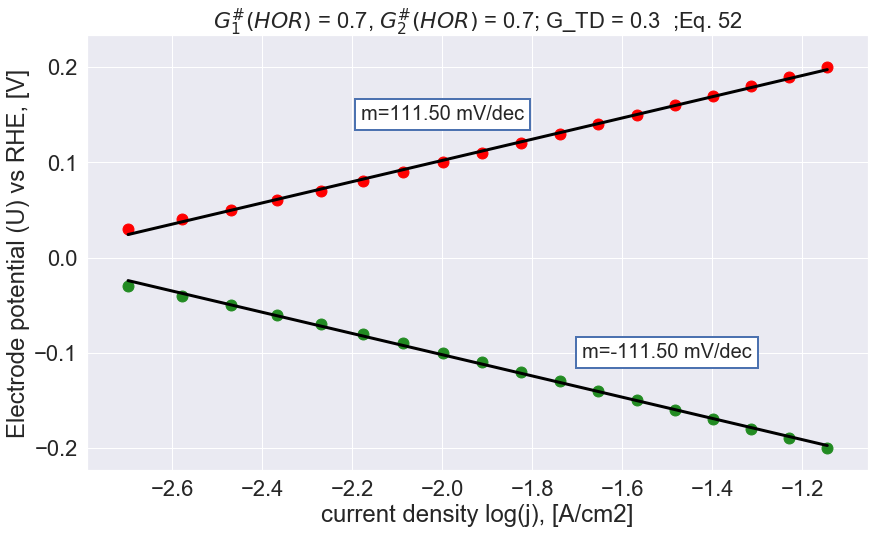

In [105]:
sns.set_style("darkgrid")
sns.set(font_scale=2)
plt.subplots(figsize=(14, 8))


plt.scatter(df1["log j_hor"],df1["U (V)"],color = "red",alpha = 1.0, s = 120)

m_hor_1, c_hor_1 = np.polyfit(df1["log j_hor"], df1["U (V)"], 1)
yfit_hor_1 = [c_hor_1 + m_hor_1 * xi for xi in df1["log j_hor"]]
plt.plot(df1["log j_hor"],yfit_hor_1, color = "black", linewidth = 3)



x = 1000
plt.text(
    -2, 0.15, f"m={m_hor_1*1000:.2f} mV/dec", ha="center", va="center", rotation=0, size=20,
    bbox=dict(boxstyle="square,pad=0.3", fc="white", ec="b", lw=2))





# main HER plotting
plt.scatter(df1["log j_her"],-df1["U (V)"],color = "forestgreen", s = 120)

# evaluation of slode
m_her, c_her = np.polyfit(df1["log j_her"], -df1["U (V)"], 1)
yfit_her = [c_her + m_her * xi for xi in df1["log j_her"]]
plt.plot(df1["log j_her"],yfit_her, color = "black", alpha = 1.0, linewidth = 3)



plt.text(
    -1.5, -0.10, f"m={m_her*1000:.2f} mV/dec", ha="center", va="center", rotation=0, size=20,
    bbox=dict(boxstyle="square,pad=0.3", fc="white", ec="b", lw=2))

x = df1["G1_hash HOR (eV)"].unique()[0] 
y = df1["G2_hash HOR (eV)"].unique()[0]
plt.title(f"$G_1^\# (HOR)$ = {x}, $G_2^\# (HOR) $ = {y}; G_TD = {value}  ;Eq. 52", fontsize = 22)
plt.ylabel('Electrode potential (U) vs RHE, [V]')
plt.xlabel('current density log(j), [A/cm2]')
plt.savefig("Delta_GTD_0.30__1.png",dpi = 1000)

In [107]:
if "df1" in globals():
    del df1

In [108]:
# df[df["G1_hash HOR (eV)"] == 0.70 && df["G2_hash HOR (eV)"] == 0.80]

value = 0.30
m1 = df["Delta_TD (eV)"]    == value
m2 = df["G1_hash HOR (eV)"] == 0.70
m3 = df["G2_hash HOR (eV)"] == 0.75


df1 = df[m1 & m2 & m3]

In [110]:
df1["Delta_TD (eV)"].unique()

array([0.3])

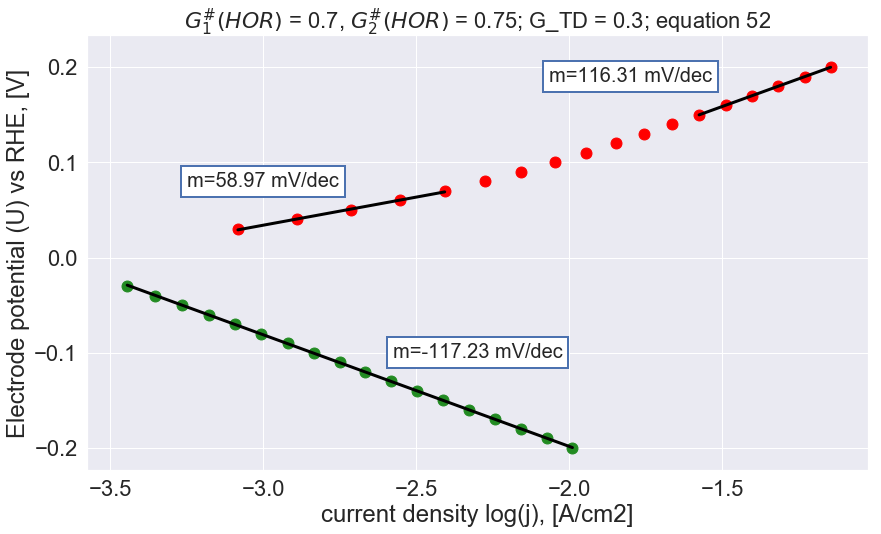

In [111]:
sns.set_style("darkgrid")
sns.set(font_scale=2)
plt.subplots(figsize=(14, 8))


plt.scatter(df1["log j_hor"],df1["U (V)"],color = "red",alpha = 1.0, s = 120)

m_hor_1, c_hor_1 = np.polyfit(df1["log j_hor"][0:5], df1["U (V)"][0:5], 1)
yfit_hor_1 = [c_hor_1 + m_hor_1 * xi for xi in df1["log j_hor"][0:5]]
plt.plot(df1["log j_hor"][0:5],yfit_hor_1, color = "black", linewidth = 3)



m_hor_2, c_hor_2 = np.polyfit(df1["log j_hor"][12:18], df1["U (V)"][12:18], 1)
yfit_hor_2 = [c_hor_2 + m_hor_2 * xi for xi in df1["log j_hor"][12:18]]
plt.plot(df1["log j_hor"][12:18],yfit_hor_2, color = "black", linewidth = 3)


x = 1000
plt.text(
    -3.0, 0.08, f"m={m_hor_1*1000:.2f} mV/dec", ha="center", va="center", rotation=0, size=20,
    bbox=dict(boxstyle="square,pad=0.3", fc="white", ec="b", lw=2))

plt.text(
    -1.8, 0.19, f"m={m_hor_2*1000:.2f} mV/dec", ha="center", va="center", rotation=0, size=20,
    bbox=dict(boxstyle="square,pad=0.3", fc="white", ec="b", lw=2))


# =============================================================================
# =============================================================================


# main HER plotting
plt.scatter(df1["log j_her"],-df1["U (V)"],color = "forestgreen", s = 120)

# evaluation of slode
m_her, c_her = np.polyfit(df1["log j_her"], -df1["U (V)"], 1)
yfit_her = [c_her + m_her * xi for xi in df1["log j_her"]]
plt.plot(df1["log j_her"],yfit_her, color = "black", alpha = 1.0, linewidth = 3)


plt.text(
    -2.3, -0.10, f"m={m_her*1000:.2f} mV/dec", ha="center", va="center", rotation=0, size=20,
    bbox=dict(boxstyle="square,pad=0.3", fc="white", ec="b", lw=2))


# General for graphics
# ====================
x = df1["G1_hash HOR (eV)"].unique()[0] 
y = df1["G2_hash HOR (eV)"].unique()[0]
plt.title(f"$G_1^\# (HOR)$ = {x}, $G_2^\# (HOR) $ = {y}; G_TD = {value}; equation 52", fontsize = 22)
plt.ylabel('Electrode potential (U) vs RHE, [V]')
plt.xlabel('current density log(j), [A/cm2]')
plt.savefig("Delta_GTD_0.30__2.png",dpi = 1000)

In [112]:
if "df1" in globals():
    del df1

In [113]:
# df[df["G1_hash HOR (eV)"] == 0.70 && df["G2_hash HOR (eV)"] == 0.80]

value = 0.30
m1 = df["Delta_TD (eV)"]    == value
m2 = df["G1_hash HOR (eV)"] == 0.70
m3 = df["G2_hash HOR (eV)"] == 0.80


df1 = df[m1 & m2 & m3]

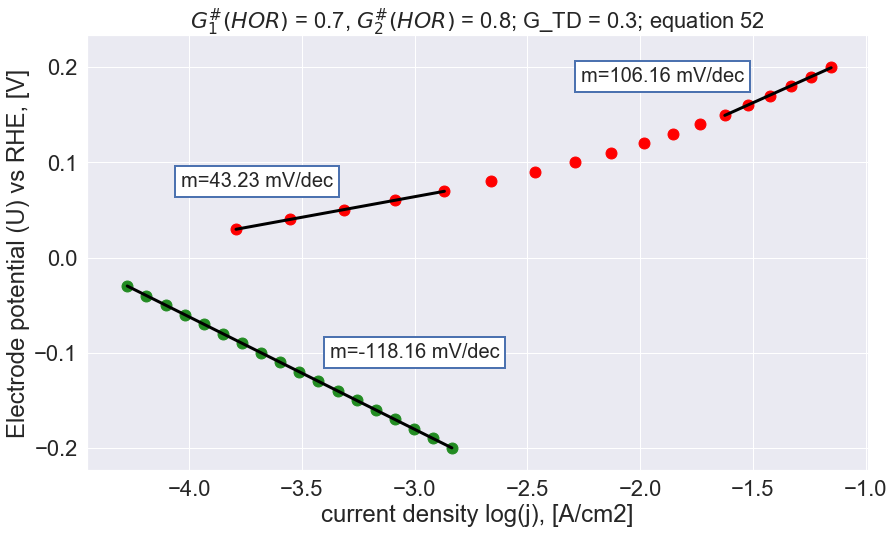

In [114]:
sns.set_style("darkgrid")
sns.set(font_scale=2)
plt.subplots(figsize=(14, 8))


plt.scatter(df1["log j_hor"],df1["U (V)"],color = "red",alpha = 1.0, s = 120)

m_hor_1, c_hor_1 = np.polyfit(df1["log j_hor"][0:5], df1["U (V)"][0:5], 1)
yfit_hor_1 = [c_hor_1 + m_hor_1 * xi for xi in df1["log j_hor"][0:5]]
plt.plot(df1["log j_hor"][0:5],yfit_hor_1, color = "black", linewidth = 3)



m_hor_2, c_hor_2 = np.polyfit(df1["log j_hor"][12:18], df1["U (V)"][12:18], 1)
yfit_hor_2 = [c_hor_2 + m_hor_2 * xi for xi in df1["log j_hor"][12:18]]
plt.plot(df1["log j_hor"][12:18],yfit_hor_2, color = "black", linewidth = 3)


x = 1000
plt.text(
    -3.7, 0.08, f"m={m_hor_1*1000:.2f} mV/dec", ha="center", va="center", rotation=0, size=20,
    bbox=dict(boxstyle="square,pad=0.3", fc="white", ec="b", lw=2))

plt.text(
    -1.9, 0.19, f"m={m_hor_2*1000:.2f} mV/dec", ha="center", va="center", rotation=0, size=20,
    bbox=dict(boxstyle="square,pad=0.3", fc="white", ec="b", lw=2))


# =============================================================================
# =============================================================================


# main HER plotting
plt.scatter(df1["log j_her"],-df1["U (V)"],color = "forestgreen", s = 120)

# evaluation of slode
m_her, c_her = np.polyfit(df1["log j_her"], -df1["U (V)"], 1)
yfit_her = [c_her + m_her * xi for xi in df1["log j_her"]]
plt.plot(df1["log j_her"],yfit_her, color = "black", alpha = 1.0, linewidth = 3)


plt.text(
    -3.0, -0.10, f"m={m_her*1000:.2f} mV/dec", ha="center", va="center", rotation=0, size=20,
    bbox=dict(boxstyle="square,pad=0.3", fc="white", ec="b", lw=2))


# General for graphics
# ====================
x = df1["G1_hash HOR (eV)"].unique()[0] 
y = df1["G2_hash HOR (eV)"].unique()[0]
plt.title(f"$G_1^\# (HOR)$ = {x}, $G_2^\# (HOR) $ = {y}; G_TD = {value}; equation 52", fontsize = 22)
plt.ylabel('Electrode potential (U) vs RHE, [V]')
plt.xlabel('current density log(j), [A/cm2]')
plt.savefig("Delta_GTD_0.30__3.png",dpi = 1000)

## \Delta_GTD = 0.20

In [121]:
if "df1" in globals():
    del df1

In [122]:
# df[df["G1_hash HOR (eV)"] == 0.70 && df["G2_hash HOR (eV)"] == 0.80]

value = 0.20
m1 = df["Delta_TD (eV)"]    == value
m2 = df["G1_hash HOR (eV)"] == 0.70
m3 = df["G2_hash HOR (eV)"] == 0.70


df1 = df[m1 & m2 & m3]

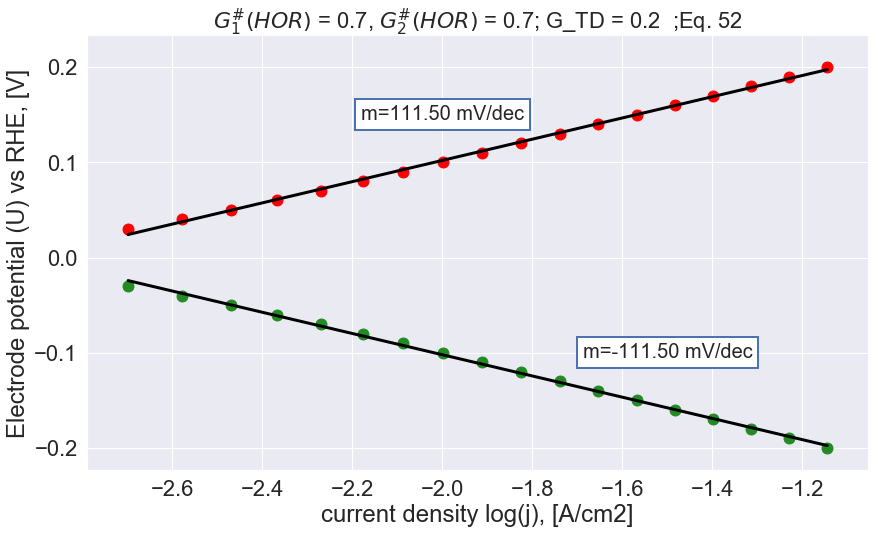

In [123]:
sns.set_style("darkgrid")
sns.set(font_scale=2)
plt.subplots(figsize=(14, 8))


plt.scatter(df1["log j_hor"],df1["U (V)"],color = "red",alpha = 1.0, s = 120)

m_hor_1, c_hor_1 = np.polyfit(df1["log j_hor"], df1["U (V)"], 1)
yfit_hor_1 = [c_hor_1 + m_hor_1 * xi for xi in df1["log j_hor"]]
plt.plot(df1["log j_hor"],yfit_hor_1, color = "black", linewidth = 3)



x = 1000
plt.text(
    -2, 0.15, f"m={m_hor_1*1000:.2f} mV/dec", ha="center", va="center", rotation=0, size=20,
    bbox=dict(boxstyle="square,pad=0.3", fc="white", ec="b", lw=2))





# main HER plotting
plt.scatter(df1["log j_her"],-df1["U (V)"],color = "forestgreen", s = 120)

# evaluation of slode
m_her, c_her = np.polyfit(df1["log j_her"], -df1["U (V)"], 1)
yfit_her = [c_her + m_her * xi for xi in df1["log j_her"]]
plt.plot(df1["log j_her"],yfit_her, color = "black", alpha = 1.0, linewidth = 3)



plt.text(
    -1.5, -0.10, f"m={m_her*1000:.2f} mV/dec", ha="center", va="center", rotation=0, size=20,
    bbox=dict(boxstyle="square,pad=0.3", fc="white", ec="b", lw=2))

x = df1["G1_hash HOR (eV)"].unique()[0] 
y = df1["G2_hash HOR (eV)"].unique()[0]
plt.title(f"$G_1^\# (HOR)$ = {x}, $G_2^\# (HOR) $ = {y}; G_TD = {value}  ;Eq. 52", fontsize = 22)
plt.ylabel('Electrode potential (U) vs RHE, [V]')
plt.xlabel('current density log(j), [A/cm2]')
plt.savefig("Delta_GTD_0.20__1.png",dpi = 1000)

In [124]:
if "df1" in globals():
    del df1

In [125]:
# df[df["G1_hash HOR (eV)"] == 0.70 && df["G2_hash HOR (eV)"] == 0.80]

value = 0.20
m1 = df["Delta_TD (eV)"]    == value
m2 = df["G1_hash HOR (eV)"] == 0.70
m3 = df["G2_hash HOR (eV)"] == 0.75


df1 = df[m1 & m2 & m3]

In [126]:
df1["Delta_TD (eV)"].unique()

array([0.2])

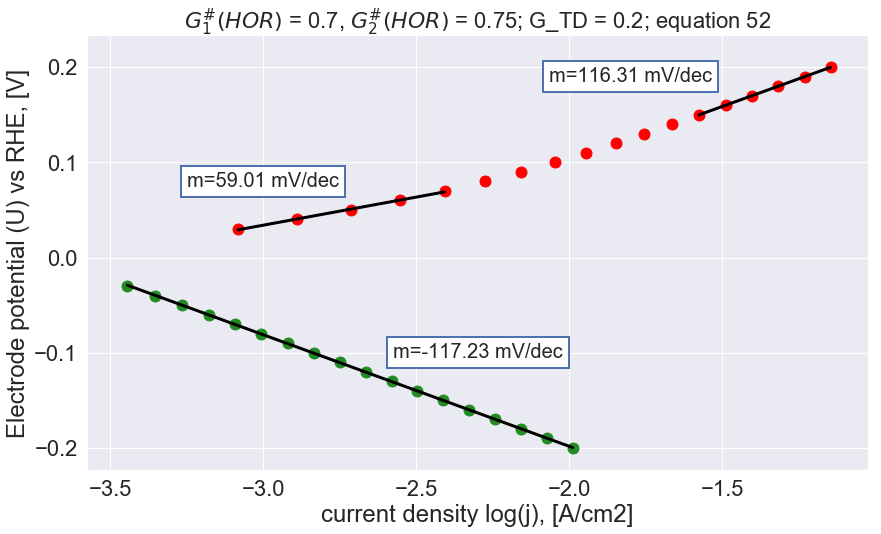

In [127]:
sns.set_style("darkgrid")
sns.set(font_scale=2)
plt.subplots(figsize=(14, 8))


plt.scatter(df1["log j_hor"],df1["U (V)"],color = "red",alpha = 1.0, s = 120)

m_hor_1, c_hor_1 = np.polyfit(df1["log j_hor"][0:5], df1["U (V)"][0:5], 1)
yfit_hor_1 = [c_hor_1 + m_hor_1 * xi for xi in df1["log j_hor"][0:5]]
plt.plot(df1["log j_hor"][0:5],yfit_hor_1, color = "black", linewidth = 3)



m_hor_2, c_hor_2 = np.polyfit(df1["log j_hor"][12:18], df1["U (V)"][12:18], 1)
yfit_hor_2 = [c_hor_2 + m_hor_2 * xi for xi in df1["log j_hor"][12:18]]
plt.plot(df1["log j_hor"][12:18],yfit_hor_2, color = "black", linewidth = 3)


x = 1000
plt.text(
    -3.0, 0.08, f"m={m_hor_1*1000:.2f} mV/dec", ha="center", va="center", rotation=0, size=20,
    bbox=dict(boxstyle="square,pad=0.3", fc="white", ec="b", lw=2))

plt.text(
    -1.8, 0.19, f"m={m_hor_2*1000:.2f} mV/dec", ha="center", va="center", rotation=0, size=20,
    bbox=dict(boxstyle="square,pad=0.3", fc="white", ec="b", lw=2))


# =============================================================================
# =============================================================================


# main HER plotting
plt.scatter(df1["log j_her"],-df1["U (V)"],color = "forestgreen", s = 120)

# evaluation of slode
m_her, c_her = np.polyfit(df1["log j_her"], -df1["U (V)"], 1)
yfit_her = [c_her + m_her * xi for xi in df1["log j_her"]]
plt.plot(df1["log j_her"],yfit_her, color = "black", alpha = 1.0, linewidth = 3)


plt.text(
    -2.3, -0.10, f"m={m_her*1000:.2f} mV/dec", ha="center", va="center", rotation=0, size=20,
    bbox=dict(boxstyle="square,pad=0.3", fc="white", ec="b", lw=2))


# General for graphics
# ====================
x = df1["G1_hash HOR (eV)"].unique()[0] 
y = df1["G2_hash HOR (eV)"].unique()[0]
plt.title(f"$G_1^\# (HOR)$ = {x}, $G_2^\# (HOR) $ = {y}; G_TD = {value}; equation 52", fontsize = 22)
plt.ylabel('Electrode potential (U) vs RHE, [V]')
plt.xlabel('current density log(j), [A/cm2]')
plt.savefig("Delta_GTD_0.20__2.png",dpi = 1000)

In [128]:
if "df1" in globals():
    del df1

In [129]:
# df[df["G1_hash HOR (eV)"] == 0.70 && df["G2_hash HOR (eV)"] == 0.80]

value = 0.20
m1 = df["Delta_TD (eV)"]    == value
m2 = df["G1_hash HOR (eV)"] == 0.70
m3 = df["G2_hash HOR (eV)"] == 0.80


df1 = df[m1 & m2 & m3]

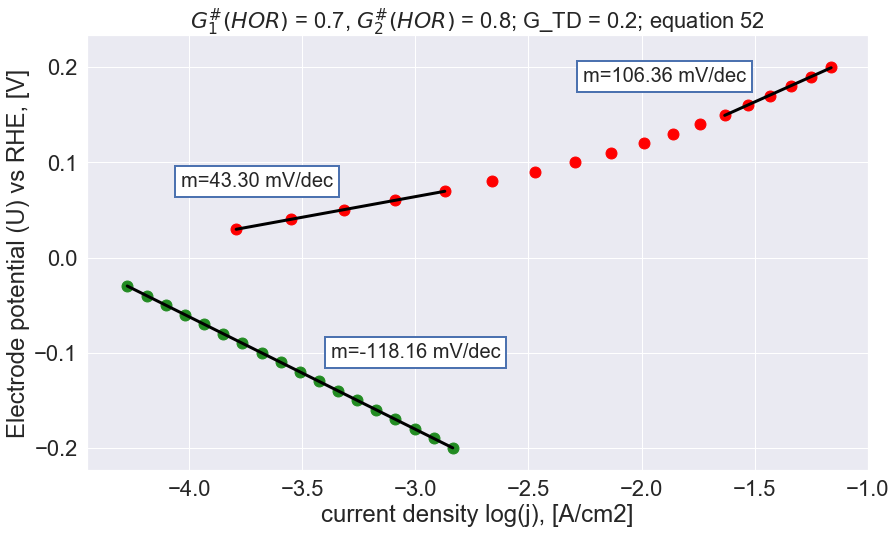

In [130]:
sns.set_style("darkgrid")
sns.set(font_scale=2)
plt.subplots(figsize=(14, 8))


plt.scatter(df1["log j_hor"],df1["U (V)"],color = "red",alpha = 1.0, s = 120)

m_hor_1, c_hor_1 = np.polyfit(df1["log j_hor"][0:5], df1["U (V)"][0:5], 1)
yfit_hor_1 = [c_hor_1 + m_hor_1 * xi for xi in df1["log j_hor"][0:5]]
plt.plot(df1["log j_hor"][0:5],yfit_hor_1, color = "black", linewidth = 3)



m_hor_2, c_hor_2 = np.polyfit(df1["log j_hor"][12:18], df1["U (V)"][12:18], 1)
yfit_hor_2 = [c_hor_2 + m_hor_2 * xi for xi in df1["log j_hor"][12:18]]
plt.plot(df1["log j_hor"][12:18],yfit_hor_2, color = "black", linewidth = 3)


x = 1000
plt.text(
    -3.7, 0.08, f"m={m_hor_1*1000:.2f} mV/dec", ha="center", va="center", rotation=0, size=20,
    bbox=dict(boxstyle="square,pad=0.3", fc="white", ec="b", lw=2))

plt.text(
    -1.9, 0.19, f"m={m_hor_2*1000:.2f} mV/dec", ha="center", va="center", rotation=0, size=20,
    bbox=dict(boxstyle="square,pad=0.3", fc="white", ec="b", lw=2))


# =============================================================================
# =============================================================================


# main HER plotting
plt.scatter(df1["log j_her"],-df1["U (V)"],color = "forestgreen", s = 120)

# evaluation of slode
m_her, c_her = np.polyfit(df1["log j_her"], -df1["U (V)"], 1)
yfit_her = [c_her + m_her * xi for xi in df1["log j_her"]]
plt.plot(df1["log j_her"],yfit_her, color = "black", alpha = 1.0, linewidth = 3)


plt.text(
    -3.0, -0.10, f"m={m_her*1000:.2f} mV/dec", ha="center", va="center", rotation=0, size=20,
    bbox=dict(boxstyle="square,pad=0.3", fc="white", ec="b", lw=2))


# General for graphics
# ====================
x = df1["G1_hash HOR (eV)"].unique()[0] 
y = df1["G2_hash HOR (eV)"].unique()[0]
plt.title(f"$G_1^\# (HOR)$ = {x}, $G_2^\# (HOR) $ = {y}; G_TD = {value}; equation 52", fontsize = 22)
plt.ylabel('Electrode potential (U) vs RHE, [V]')
plt.xlabel('current density log(j), [A/cm2]')
plt.savefig("Delta_GTD_0.20__3.png",dpi = 1000)

## \Delta_GTD = 0.10

In [131]:
if "df1" in globals():
    del df1

In [132]:
# df[df["G1_hash HOR (eV)"] == 0.70 && df["G2_hash HOR (eV)"] == 0.80]

value = 0.10
m1 = df["Delta_TD (eV)"]    == value
m2 = df["G1_hash HOR (eV)"] == 0.70
m3 = df["G2_hash HOR (eV)"] == 0.70


df1 = df[m1 & m2 & m3]

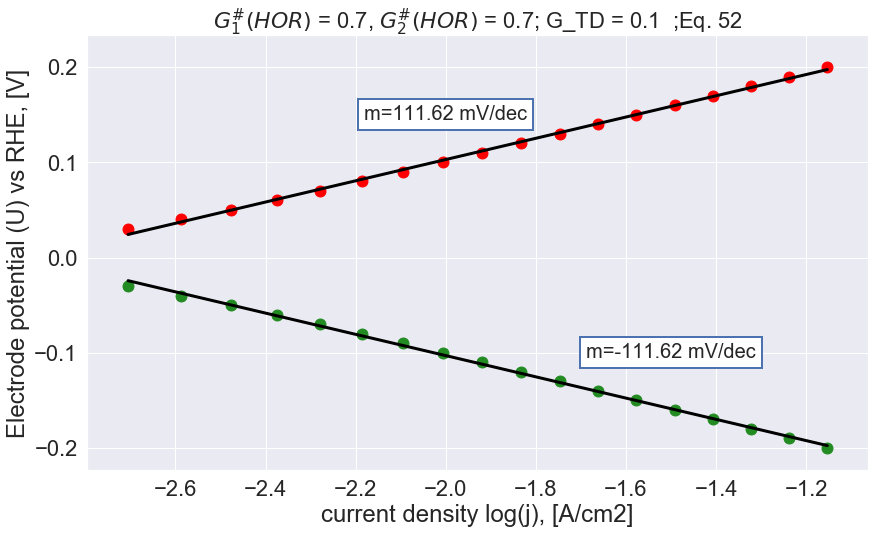

In [133]:
sns.set_style("darkgrid")
sns.set(font_scale=2)
plt.subplots(figsize=(14, 8))


plt.scatter(df1["log j_hor"],df1["U (V)"],color = "red",alpha = 1.0, s = 120)

m_hor_1, c_hor_1 = np.polyfit(df1["log j_hor"], df1["U (V)"], 1)
yfit_hor_1 = [c_hor_1 + m_hor_1 * xi for xi in df1["log j_hor"]]
plt.plot(df1["log j_hor"],yfit_hor_1, color = "black", linewidth = 3)



x = 1000
plt.text(
    -2, 0.15, f"m={m_hor_1*1000:.2f} mV/dec", ha="center", va="center", rotation=0, size=20,
    bbox=dict(boxstyle="square,pad=0.3", fc="white", ec="b", lw=2))





# main HER plotting
plt.scatter(df1["log j_her"],-df1["U (V)"],color = "forestgreen", s = 120)

# evaluation of slode
m_her, c_her = np.polyfit(df1["log j_her"], -df1["U (V)"], 1)
yfit_her = [c_her + m_her * xi for xi in df1["log j_her"]]
plt.plot(df1["log j_her"],yfit_her, color = "black", alpha = 1.0, linewidth = 3)



plt.text(
    -1.5, -0.10, f"m={m_her*1000:.2f} mV/dec", ha="center", va="center", rotation=0, size=20,
    bbox=dict(boxstyle="square,pad=0.3", fc="white", ec="b", lw=2))

x = df1["G1_hash HOR (eV)"].unique()[0] 
y = df1["G2_hash HOR (eV)"].unique()[0]
plt.title(f"$G_1^\# (HOR)$ = {x}, $G_2^\# (HOR) $ = {y}; G_TD = {value}  ;Eq. 52", fontsize = 22)
plt.ylabel('Electrode potential (U) vs RHE, [V]')
plt.xlabel('current density log(j), [A/cm2]')
plt.savefig("Delta_GTD_0.10__1.png",dpi = 1000)

In [134]:
if "df1" in globals():
    del df1

In [135]:
# df[df["G1_hash HOR (eV)"] == 0.70 && df["G2_hash HOR (eV)"] == 0.80]

value = 0.10
m1 = df["Delta_TD (eV)"]    == value
m2 = df["G1_hash HOR (eV)"] == 0.70
m3 = df["G2_hash HOR (eV)"] == 0.75


df1 = df[m1 & m2 & m3]

In [136]:
df1["Delta_TD (eV)"].unique()

array([0.1])

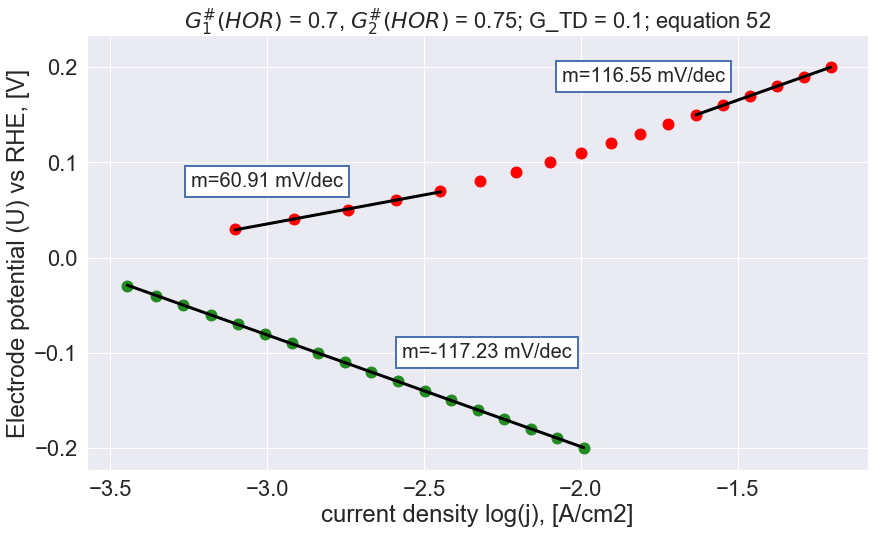

In [137]:
sns.set_style("darkgrid")
sns.set(font_scale=2)
plt.subplots(figsize=(14, 8))


plt.scatter(df1["log j_hor"],df1["U (V)"],color = "red",alpha = 1.0, s = 120)

m_hor_1, c_hor_1 = np.polyfit(df1["log j_hor"][0:5], df1["U (V)"][0:5], 1)
yfit_hor_1 = [c_hor_1 + m_hor_1 * xi for xi in df1["log j_hor"][0:5]]
plt.plot(df1["log j_hor"][0:5],yfit_hor_1, color = "black", linewidth = 3)



m_hor_2, c_hor_2 = np.polyfit(df1["log j_hor"][12:18], df1["U (V)"][12:18], 1)
yfit_hor_2 = [c_hor_2 + m_hor_2 * xi for xi in df1["log j_hor"][12:18]]
plt.plot(df1["log j_hor"][12:18],yfit_hor_2, color = "black", linewidth = 3)


x = 1000
plt.text(
    -3.0, 0.08, f"m={m_hor_1*1000:.2f} mV/dec", ha="center", va="center", rotation=0, size=20,
    bbox=dict(boxstyle="square,pad=0.3", fc="white", ec="b", lw=2))

plt.text(
    -1.8, 0.19, f"m={m_hor_2*1000:.2f} mV/dec", ha="center", va="center", rotation=0, size=20,
    bbox=dict(boxstyle="square,pad=0.3", fc="white", ec="b", lw=2))


# =============================================================================
# =============================================================================


# main HER plotting
plt.scatter(df1["log j_her"],-df1["U (V)"],color = "forestgreen", s = 120)

# evaluation of slode
m_her, c_her = np.polyfit(df1["log j_her"], -df1["U (V)"], 1)
yfit_her = [c_her + m_her * xi for xi in df1["log j_her"]]
plt.plot(df1["log j_her"],yfit_her, color = "black", alpha = 1.0, linewidth = 3)


plt.text(
    -2.3, -0.10, f"m={m_her*1000:.2f} mV/dec", ha="center", va="center", rotation=0, size=20,
    bbox=dict(boxstyle="square,pad=0.3", fc="white", ec="b", lw=2))


# General for graphics
# ====================
x = df1["G1_hash HOR (eV)"].unique()[0] 
y = df1["G2_hash HOR (eV)"].unique()[0]
plt.title(f"$G_1^\# (HOR)$ = {x}, $G_2^\# (HOR) $ = {y}; G_TD = {value}; equation 52", fontsize = 22)
plt.ylabel('Electrode potential (U) vs RHE, [V]')
plt.xlabel('current density log(j), [A/cm2]')
plt.savefig("Delta_GTD_0.10__2.png",dpi = 1000)

In [138]:
if "df1" in globals():
    del df1

In [139]:
# df[df["G1_hash HOR (eV)"] == 0.70 && df["G2_hash HOR (eV)"] == 0.80]

value = 0.10
m1 = df["Delta_TD (eV)"]    == value
m2 = df["G1_hash HOR (eV)"] == 0.70
m3 = df["G2_hash HOR (eV)"] == 0.80


df1 = df[m1 & m2 & m3]

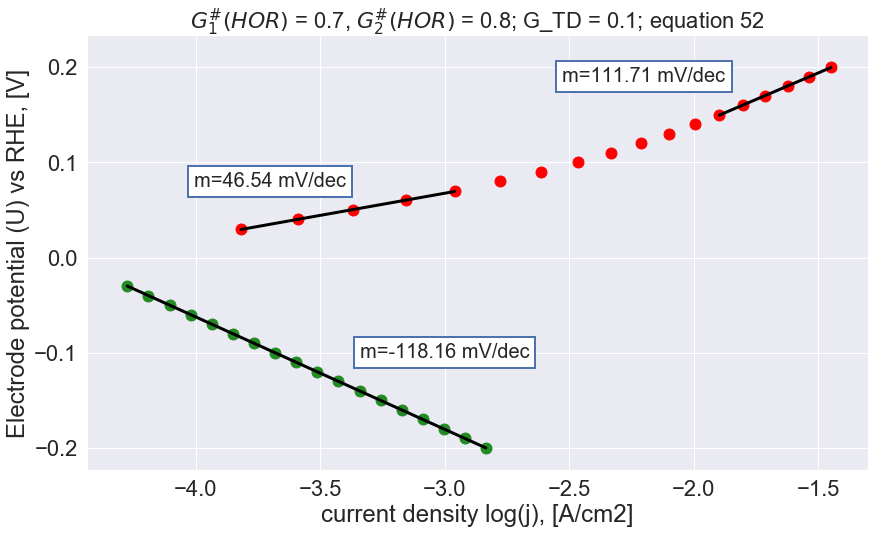

In [142]:
sns.set_style("darkgrid")
sns.set(font_scale=2)
plt.subplots(figsize=(14, 8))


plt.scatter(df1["log j_hor"],df1["U (V)"],color = "red",alpha = 1.0, s = 120)

m_hor_1, c_hor_1 = np.polyfit(df1["log j_hor"][0:5], df1["U (V)"][0:5], 1)
yfit_hor_1 = [c_hor_1 + m_hor_1 * xi for xi in df1["log j_hor"][0:5]]
plt.plot(df1["log j_hor"][0:5],yfit_hor_1, color = "black", linewidth = 3)



m_hor_2, c_hor_2 = np.polyfit(df1["log j_hor"][12:18], df1["U (V)"][12:18], 1)
yfit_hor_2 = [c_hor_2 + m_hor_2 * xi for xi in df1["log j_hor"][12:18]]
plt.plot(df1["log j_hor"][12:18],yfit_hor_2, color = "black", linewidth = 3)


x = 1000
plt.text(
    -3.7, 0.08, f"m={m_hor_1*1000:.2f} mV/dec", ha="center", va="center", rotation=0, size=20,
    bbox=dict(boxstyle="square,pad=0.3", fc="white", ec="b", lw=2))

plt.text(
    -2.2, 0.19, f"m={m_hor_2*1000:.2f} mV/dec", ha="center", va="center", rotation=0, size=20,
    bbox=dict(boxstyle="square,pad=0.3", fc="white", ec="b", lw=2))


# =============================================================================
# =============================================================================


# main HER plotting
plt.scatter(df1["log j_her"],-df1["U (V)"],color = "forestgreen", s = 120)

# evaluation of slode
m_her, c_her = np.polyfit(df1["log j_her"], -df1["U (V)"], 1)
yfit_her = [c_her + m_her * xi for xi in df1["log j_her"]]
plt.plot(df1["log j_her"],yfit_her, color = "black", alpha = 1.0, linewidth = 3)


plt.text(
    -3.0, -0.10, f"m={m_her*1000:.2f} mV/dec", ha="center", va="center", rotation=0, size=20,
    bbox=dict(boxstyle="square,pad=0.3", fc="white", ec="b", lw=2))


# General for graphics
# ====================
x = df1["G1_hash HOR (eV)"].unique()[0] 
y = df1["G2_hash HOR (eV)"].unique()[0]
plt.title(f"$G_1^\# (HOR)$ = {x}, $G_2^\# (HOR) $ = {y}; G_TD = {value}; equation 52", fontsize = 22)
plt.ylabel('Electrode potential (U) vs RHE, [V]')
plt.xlabel('current density log(j), [A/cm2]')
plt.savefig("Delta_GTD_0.10__3.png",dpi = 1000)

## \Delta_GTD = 0

In [180]:
if "df1" in globals():
    del df1

In [181]:
# df[df["G1_hash HOR (eV)"] == 0.70 && df["G2_hash HOR (eV)"] == 0.80]

value = 0
m1 = df["Delta_TD (eV)"]    == value
m2 = df["G1_hash HOR (eV)"] == 0.70
m3 = df["G2_hash HOR (eV)"] == 0.70


df1 = df[m1 & m2 & m3]

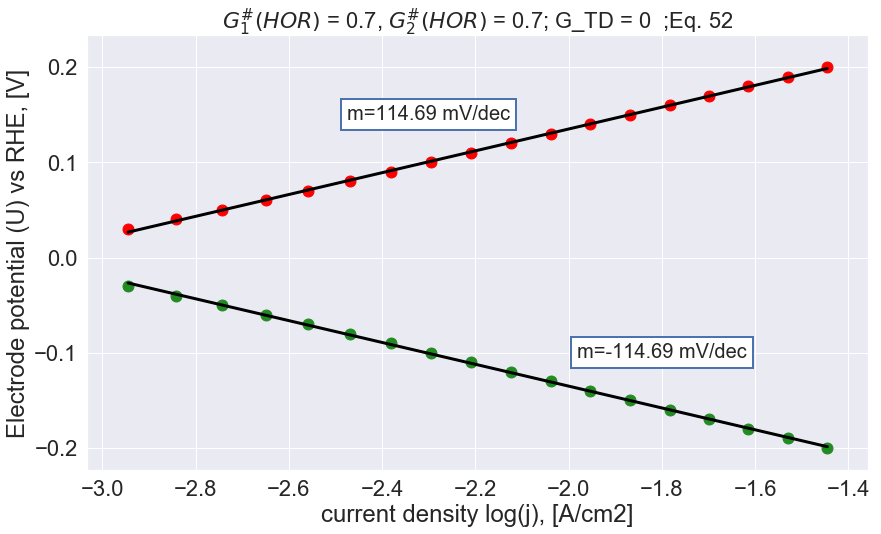

In [182]:
sns.set_style("darkgrid")
sns.set(font_scale=2)
plt.subplots(figsize=(14, 8))


plt.scatter(df1["log j_hor"],df1["U (V)"],color = "red",alpha = 1.0, s = 120)

m_hor_1, c_hor_1 = np.polyfit(df1["log j_hor"], df1["U (V)"], 1)
yfit_hor_1 = [c_hor_1 + m_hor_1 * xi for xi in df1["log j_hor"]]
plt.plot(df1["log j_hor"],yfit_hor_1, color = "black", linewidth = 3)



x = 1000
plt.text(
    -2.3, 0.15, f"m={m_hor_1*1000:.2f} mV/dec", ha="center", va="center", rotation=0, size=20,
    bbox=dict(boxstyle="square,pad=0.3", fc="white", ec="b", lw=2))





# main HER plotting
plt.scatter(df1["log j_her"],-df1["U (V)"],color = "forestgreen", s = 120)

# evaluation of slode
m_her, c_her = np.polyfit(df1["log j_her"], -df1["U (V)"], 1)
yfit_her = [c_her + m_her * xi for xi in df1["log j_her"]]
plt.plot(df1["log j_her"],yfit_her, color = "black", alpha = 1.0, linewidth = 3)



plt.text(
    -1.8, -0.10, f"m={m_her*1000:.2f} mV/dec", ha="center", va="center", rotation=0, size=20,
    bbox=dict(boxstyle="square,pad=0.3", fc="white", ec="b", lw=2))

x = df1["G1_hash HOR (eV)"].unique()[0] 
y = df1["G2_hash HOR (eV)"].unique()[0]
plt.title(f"$G_1^\# (HOR)$ = {x}, $G_2^\# (HOR) $ = {y}; G_TD = {value}  ;Eq. 52", fontsize = 22)
plt.ylabel('Electrode potential (U) vs RHE, [V]')
plt.xlabel('current density log(j), [A/cm2]')
plt.savefig("Delta_GTD_0__1.png",dpi = 1000)

In [183]:
if "df1" in globals():
    del df1

In [184]:
# df[df["G1_hash HOR (eV)"] == 0.70 && df["G2_hash HOR (eV)"] == 0.80]

value = 0
m1 = df["Delta_TD (eV)"]    == value
m2 = df["G1_hash HOR (eV)"] == 0.70
m3 = df["G2_hash HOR (eV)"] == 0.75


df1 = df[m1 & m2 & m3]

In [185]:
df1["Delta_TD (eV)"].unique()

array([0.])

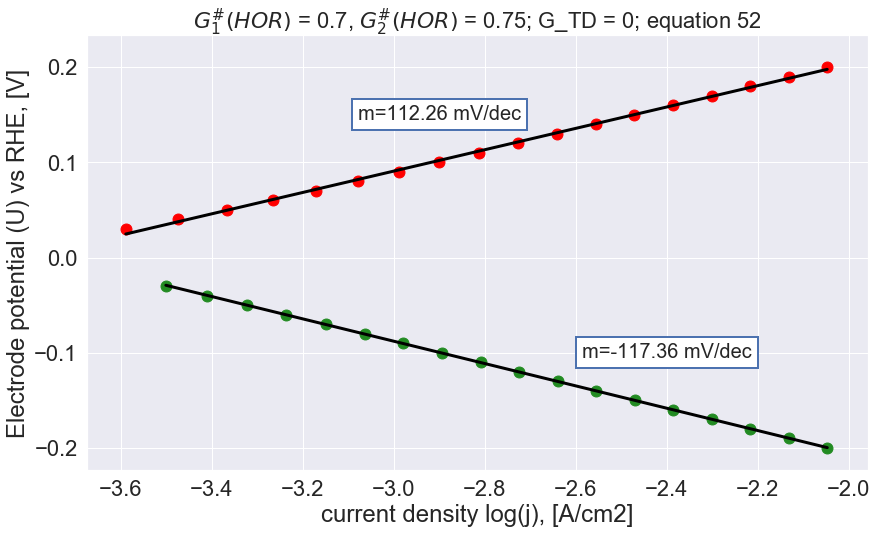

In [186]:
sns.set_style("darkgrid")
sns.set(font_scale=2)
plt.subplots(figsize=(14, 8))


plt.scatter(df1["log j_hor"],df1["U (V)"],color = "red",alpha = 1.0, s = 120)


m_hor_1, c_hor_1 = np.polyfit(df1["log j_hor"], df1["U (V)"], 1)
yfit_hor_1 = [c_hor_1 + m_hor_1 * xi for xi in df1["log j_hor"]]
plt.plot(df1["log j_hor"],yfit_hor_1, color = "black", linewidth = 3)

x = 1000
plt.text(
    -2.9, 0.15, f"m={m_hor_1*1000:.2f} mV/dec", ha="center", va="center", rotation=0, size=20,
    bbox=dict(boxstyle="square,pad=0.3", fc="white", ec="b", lw=2))

"""
m_hor_2, c_hor_2 = np.polyfit(df1["log j_hor"][12:18], df1["U (V)"][12:18], 1)
yfit_hor_2 = [c_hor_2 + m_hor_2 * xi for xi in df1["log j_hor"][12:18]]
plt.plot(df1["log j_hor"][12:18],yfit_hor_2, color = "black", linewidth = 3)

plt.text(
    -1.8, 0.19, f"m={m_hor_2*1000:.2f} mV/dec", ha="center", va="center", rotation=0, size=20,
    bbox=dict(boxstyle="square,pad=0.3", fc="white", ec="b", lw=2))
"""

# =============================================================================
# =============================================================================


# main HER plotting
plt.scatter(df1["log j_her"],-df1["U (V)"],color = "forestgreen", s = 120)

# evaluation of slode
m_her, c_her = np.polyfit(df1["log j_her"], -df1["U (V)"], 1)
yfit_her = [c_her + m_her * xi for xi in df1["log j_her"]]
plt.plot(df1["log j_her"],yfit_her, color = "black", alpha = 1.0, linewidth = 3)


plt.text(
    -2.4, -0.10, f"m={m_her*1000:.2f} mV/dec", ha="center", va="center", rotation=0, size=20,
    bbox=dict(boxstyle="square,pad=0.3", fc="white", ec="b", lw=2))


# General for graphics
# ====================
x = df1["G1_hash HOR (eV)"].unique()[0] 
y = df1["G2_hash HOR (eV)"].unique()[0]
plt.title(f"$G_1^\# (HOR)$ = {x}, $G_2^\# (HOR) $ = {y}; G_TD = {value}; equation 52", fontsize = 22)
plt.ylabel('Electrode potential (U) vs RHE, [V]')
plt.xlabel('current density log(j), [A/cm2]')
plt.savefig("Delta_GTD_0__2.png",dpi = 1000)

In [187]:
if "df1" in globals():
    del df1

In [188]:
# df[df["G1_hash HOR (eV)"] == 0.70 && df["G2_hash HOR (eV)"] == 0.80]

value = 0
m1 = df["Delta_TD (eV)"]    == value
m2 = df["G1_hash HOR (eV)"] == 0.70
m3 = df["G2_hash HOR (eV)"] == 0.80


df1 = df[m1 & m2 & m3]

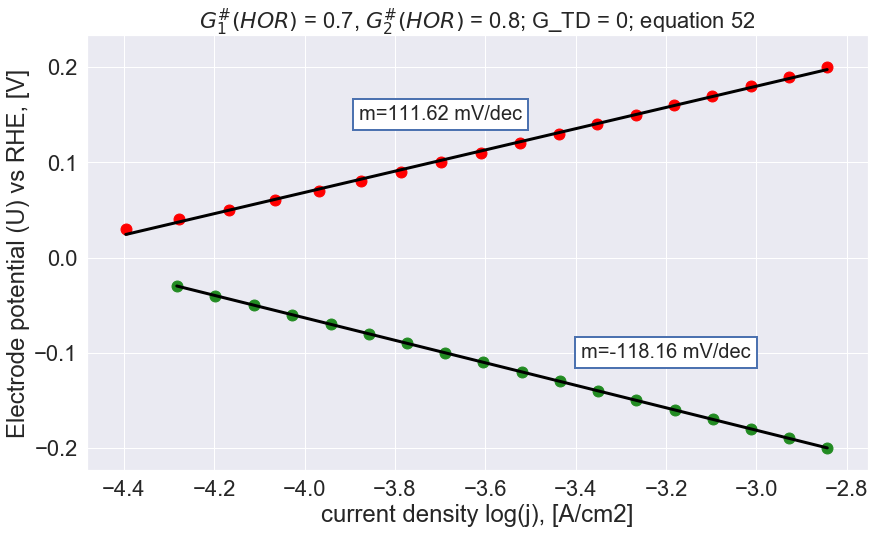

In [189]:
sns.set_style("darkgrid")
sns.set(font_scale=2)
plt.subplots(figsize=(14, 8))


plt.scatter(df1["log j_hor"],df1["U (V)"],color = "red",alpha = 1.0, s = 120)


m_hor_1, c_hor_1 = np.polyfit(df1["log j_hor"], df1["U (V)"], 1)
yfit_hor_1 = [c_hor_1 + m_hor_1 * xi for xi in df1["log j_hor"]]
plt.plot(df1["log j_hor"],yfit_hor_1, color = "black", linewidth = 3)

x = 1000
plt.text(
    -3.7, 0.15, f"m={m_hor_1*1000:.2f} mV/dec", ha="center", va="center", rotation=0, size=20,
    bbox=dict(boxstyle="square,pad=0.3", fc="white", ec="b", lw=2))

"""
m_hor_2, c_hor_2 = np.polyfit(df1["log j_hor"][12:18], df1["U (V)"][12:18], 1)
yfit_hor_2 = [c_hor_2 + m_hor_2 * xi for xi in df1["log j_hor"][12:18]]
plt.plot(df1["log j_hor"][12:18],yfit_hor_2, color = "black", linewidth = 3)

plt.text(
    -1.8, 0.19, f"m={m_hor_2*1000:.2f} mV/dec", ha="center", va="center", rotation=0, size=20,
    bbox=dict(boxstyle="square,pad=0.3", fc="white", ec="b", lw=2))
"""

# =============================================================================
# =============================================================================


# main HER plotting
plt.scatter(df1["log j_her"],-df1["U (V)"],color = "forestgreen", s = 120)

# evaluation of slode
m_her, c_her = np.polyfit(df1["log j_her"], -df1["U (V)"], 1)
yfit_her = [c_her + m_her * xi for xi in df1["log j_her"]]
plt.plot(df1["log j_her"],yfit_her, color = "black", alpha = 1.0, linewidth = 3)


plt.text(
    -3.2, -0.10, f"m={m_her*1000:.2f} mV/dec", ha="center", va="center", rotation=0, size=20,
    bbox=dict(boxstyle="square,pad=0.3", fc="white", ec="b", lw=2))


# General for graphics
# ====================
x = df1["G1_hash HOR (eV)"].unique()[0] 
y = df1["G2_hash HOR (eV)"].unique()[0]
plt.title(f"$G_1^\# (HOR)$ = {x}, $G_2^\# (HOR) $ = {y}; G_TD = {value}; equation 52", fontsize = 22)
plt.ylabel('Electrode potential (U) vs RHE, [V]')
plt.xlabel('current density log(j), [A/cm2]')
plt.savefig("Delta_GTD_0__3.png",dpi = 1000)

# ==================
# ==================

#### ===============================

## Fig 4 wITH Eq 52 <a id="ref_2.1"></a>

In [221]:
%reset -f
import math
import numpy as np
import pandas as pd
# from statistics import mean
# ================
import matplotlib.pyplot as plt
import seaborn as sns

In [222]:
# variable in  in [ev]
# --------------------

boltz   = 8.6173e-5     #  eV/Kelvin
planck  = 4.1357e-15    #  eV.s
tempe   = 298.15        #  Kelvin
from scipy.constants import e


In [223]:
e

1.602176634e-19

In [224]:

U = np.array([0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20])


Delta_G_TD  = np.array([0, 0.05, 0.10, 0.15, 0.20])  

# Note: these values will be recoed oppositely in the datafame, I choose to write HOR
G1_hash_array = np.array([0.80])  
G2_hash_array = np.array([0.70]) 


alpha1 = np.array([0.5])            
alpha2 = np.array([0.5])            

Gamma_act   = np.array([5*math.pow(10, 14)])

tem_kb = boltz * tempe 

In [225]:
print(tem_kb)

0.02569247995


In [226]:
print(U)
print(Gamma_act)

[0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13 0.14 0.15 0.16
 0.17 0.18 0.19 0.2 ]
[5.e+14]


In [227]:
len(U) * len(G1_hash_array) * len(G2_hash_array)

18

In [228]:
tafel = np.empty((0, 9), float)   # 0,8 Column array

for u1 in range(len(U)):
    for g1 in range(len(G1_hash_array)):
        for g2 in range(len(G2_hash_array)):
            for gTD in range(len(Delta_G_TD)):
                for al1 in range(len(alpha1)):
                    for al2 in range(len(alpha2)):
                        for gam in range(len(Gamma_act)):
                                
                                # HER
                                # ----
                                # ----
                                
                                # defining g1_hash, g2_hash, Delta_G_TD for HER
                                # ---------------------------------------------
                                g1_hash = G1_hash_array[g1]
                                g2_hash = G2_hash_array[g2]
                                dg_TD   = Delta_G_TD[gTD]
                                u  = U[u1]
                                
                        
                                # tem_kb = boltz * tempe    already defined above once
                                # ----------------------------------------------------
                                locally_cons =  (2 * tem_kb * e * Gamma_act[gam]) / planck 
                                
                                
                                # J__HER
                                # ----
                                A = np.exp( ( (alpha1[al1]+alpha2[al2]) * u ) / tem_kb )
                                
                                B = np.exp( (g1_hash + (alpha2[al2] * u ) )   / tem_kb  )
                                C = np.exp( (g2_hash - (1-alpha1[al1]) * u) / tem_kb  )
                                D = np.exp( (g2_hash  - dg_TD  + (alpha1[al1] * u) ) / tem_kb  )
                                
                
                                j__HER =   (-1 *locally_cons * A) / (B + C + D)
                    
                    
                                # delete HER local variables
                                # -----------------------
                                del g1_hash 
                                del g2_hash
                                del dg_TD  
                            
                                del A; del B; del C; del D; del u  
                    
                    
                                # ====================================================================================================================================
                                # ====================================================================================================================================
                                # ====================================================================================================================================
                    
                    
                    
                                # HOR
                                # ----
                                # ----

                                # defining g1_hash, g2_hash, Delta_G_TD for HOR      WORK WORK WORK WORK.....
                                # ---------------------------------------------
                                g1_hash = G2_hash_array[g2]
                                g2_hash = G1_hash_array[g1]
                                dg_TD   = Delta_G_TD[gTD] 
                                u  = U[u1]
                                
        
                                
                                # J__HOR
                                # ----
                                A = np.exp( ( (alpha1[al1]+alpha2[al2]) * u ) / tem_kb )
                                
                                B = np.exp( (g1_hash + (alpha2[al2] * u ) )   / tem_kb  )
                                C = np.exp( (g2_hash - (1-alpha1[al1]) * u ) / tem_kb  )
                                D = np.exp( (g2_hash  - dg_TD  + (alpha1[al1] * u) ) / tem_kb  )
                                
                
                                j__HOR =   (1 *locally_cons * A) / (B + C + D)
                    
                    
                    
                    
                                tafel = np.append(tafel, np.array([[u,alpha1[al1],alpha2[al2],Gamma_act[gam],dg_TD,g1_hash,g2_hash,j__HER,j__HOR]]), axis = 0   )
                    
                    
                                # delete HER local variables
                                # -----------------------
                                del g1_hash 
                                del g2_hash
                                del dg_TD  
                            
                                del A; del B; del C; del D;

In [229]:
if "df" in globals():
    del df
    
df = pd.DataFrame(tafel, columns = ['U (V)','alpha1 (eV)','alpha2 (eV)','Gamma_act (#/cm2)','Delta_TD (eV)', 'G1_hash HOR (eV)','G2_hash HOR (eV)','j_her (uA/cm2)','j_hor (uA/cm2)'])


decimals = 8    
df['U (V)']             =   df['U (V)'].apply(lambda x: round(x, decimals)) 
df['alpha1 (eV)']       =   df['alpha1 (eV)'].apply(lambda x: round(x, decimals))
df['alpha2 (eV)']       =   df['alpha1 (eV)'].apply(lambda x: round(x, decimals))
df['Delta_TD (eV)']     =   df['Delta_TD (eV)'].apply(lambda x: round(x, decimals))
df['G1_hash HOR (eV)']  =   df['G1_hash HOR (eV)'].apply(lambda x: round(x, decimals))
df['G2_hash HOR (eV)']  =   df['G2_hash HOR (eV)'].apply(lambda x: round(x, decimals))
df['j_her (uA/cm2)']    =   df['j_her (uA/cm2)'].apply(lambda x: round(x, decimals+1))
df['j_hor (uA/cm2)']    =   df['j_hor (uA/cm2)'].apply(lambda x: round(x, decimals+1))


# convert_dict = {i:float for i in df2.columns if i != 'GDS_OER'}
# df2 = df2.astype(convert_dict)

In [230]:
# Taking the log values
# ----------------------
df["log j_hor"] = np.log10(df["j_hor (uA/cm2)"])
df["log j_her"] = np.log10(-df["j_her (uA/cm2)"])

In [231]:
df["j_her (uA/cm2)"].any() > 0

True

In [232]:
df[0:6]

,U (V),alpha1 (eV),alpha2 (eV),Gamma_act (#/cm2),Delta_TD (eV),G1_hash HOR (eV),G2_hash HOR (eV),j_her (uA/cm2),j_hor (uA/cm2),log j_hor,log j_her
0,0.03,0.5,0.5,5.000000e+14,0.00,0.7,0.8,-0.000052,0.000040,-4.395666,-4.282796
1,0.03,0.5,0.5,5.000000e+14,0.05,0.7,0.8,-0.000053,0.000113,-3.947406,-4.275331
2,0.03,0.5,0.5,5.000000e+14,0.10,0.7,0.8,-0.000053,0.000152,-3.817745,-4.274260
3,0.03,0.5,0.5,5.000000e+14,0.15,0.7,0.8,-0.000053,0.000160,-3.795609,-4.274105
4,0.03,0.5,0.5,5.000000e+14,0.20,0.7,0.8,-0.000053,0.000161,-3.792352,-4.274080
5,0.04,0.5,0.5,5.000000e+14,0.00,0.7,0.8,-0.000063,0.000053,-4.277136,-4.197411


In [233]:
if "df1" in globals():
    del df1

In [234]:
df["Delta_TD (eV)"].unique()

array([0.  , 0.05, 0.1 , 0.15, 0.2 ])

In [235]:
# df[df["G1_hash HOR (eV)"] == 0.70 && df["G2_hash HOR (eV)"] == 0.80]

value = 0
m1 = df["Delta_TD (eV)"]    == value
m2 = df["G1_hash HOR (eV)"] == 0.70
m3 = df["G2_hash HOR (eV)"] == 0.80


df1 = df[m1 & m2 & m3]

In [236]:
value = 0.05
m1 = df["Delta_TD (eV)"]    == value
m2 = df["G1_hash HOR (eV)"] == 0.70
m3 = df["G2_hash HOR (eV)"] == 0.80

df2 = df[m1 & m2 & m3]

In [237]:
value = 0.10
m1 = df["Delta_TD (eV)"]    == value
m2 = df["G1_hash HOR (eV)"] == 0.70
m3 = df["G2_hash HOR (eV)"] == 0.80

df3 = df[m1 & m2 & m3]

In [238]:
value = 0.15
m1 = df["Delta_TD (eV)"]    == value
m2 = df["G1_hash HOR (eV)"] == 0.70
m3 = df["G2_hash HOR (eV)"] == 0.80

df4 = df[m1 & m2 & m3]

In [239]:
value = 0.20
m1 = df["Delta_TD (eV)"]    == value
m2 = df["G1_hash HOR (eV)"] == 0.70
m3 = df["G2_hash HOR (eV)"] == 0.80

df5 = df[m1 & m2 & m3]

In [244]:
df1

,U (V),alpha1 (eV),alpha2 (eV),Gamma_act (#/cm2),Delta_TD (eV),G1_hash HOR (eV),G2_hash HOR (eV),j_her (uA/cm2),j_hor (uA/cm2),log j_hor,log j_her
0,0.03,0.5,0.5,5.000000e+14,0.0,0.7,0.8,-0.000052,0.000040,-4.395666,-4.282796
5,0.04,0.5,0.5,5.000000e+14,0.0,0.7,0.8,-0.000063,0.000053,-4.277136,-4.197411
10,0.05,0.5,0.5,5.000000e+14,0.0,0.7,0.8,-0.000077,0.000068,-4.167964,-4.112304
15,0.06,0.5,0.5,5.000000e+14,0.0,0.7,0.8,-0.000094,0.000086,-4.065901,-4.027385
20,0.07,0.5,0.5,5.000000e+14,0.0,0.7,0.8,-0.000114,0.000107,-3.969081,-3.942600
25,0.08,0.5,0.5,5.000000e+14,0.0,0.7,0.8,-0.000139,0.000133,-3.876024,-3.857898
30,0.09,0.5,0.5,5.000000e+14,0.0,0.7,0.8,-0.000169,0.000164,-3.785622,-3.773256
35,0.10,0.5,0.5,5.000000e+14,0.0,0.7,0.8,-0.000205,0.000201,-3.697074,-3.688653
40,0.11,0.5,0.5,5.000000e+14,0.0,0.7,0.8,-0.000249,0.000246,-3.609802,-3.604078
45,0.12,0.5,0.5,5.000000e+14,0.0,0.7,0.8,-0.000302,0.000300,-3.523409,-3.519522


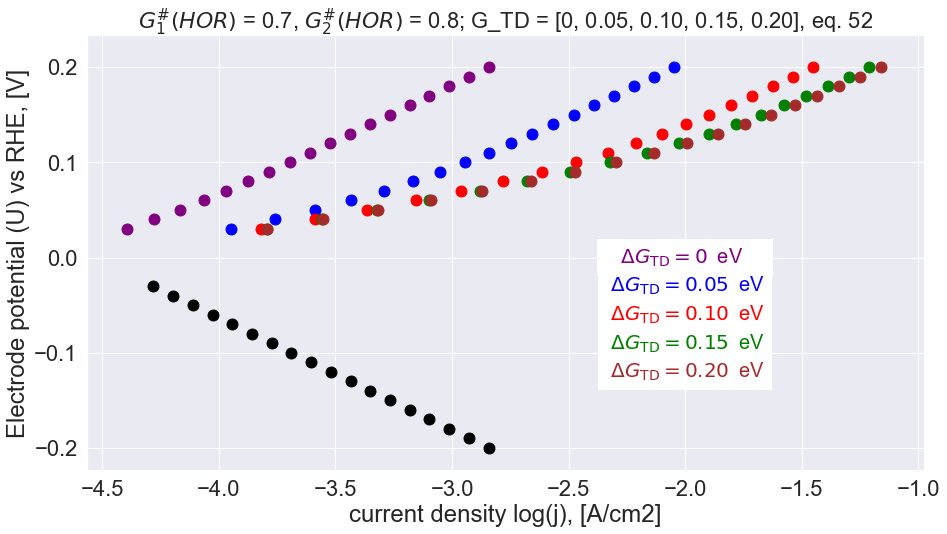

In [382]:
sns.set_style("darkgrid")
sns.set(font_scale=2)
plt.subplots(figsize=(15, 8))


plt.scatter(df1["log j_hor"],df1["U (V)"],color = "purple",alpha = 1.0, s = 120)
plt.scatter(df2["log j_hor"],df2["U (V)"],color = "blue",alpha = 1.0, s = 120)
plt.scatter(df3["log j_hor"],df3["U (V)"],color = "red",alpha = 1.0, s = 120)
plt.scatter(df4["log j_hor"],df4["U (V)"],color = "green",alpha = 1.0, s = 120)
plt.scatter(df5["log j_hor"],df5["U (V)"],color = "brown",alpha = 1.0, s = 120)

""""
m_hor_1, c_hor_1 = np.polyfit(df1["log j_hor"], df1["U (V)"], 1)
yfit_hor_1 = [c_hor_1 + m_hor_1 * xi for xi in df1["log j_hor"]]
plt.plot(df1["log j_hor"],yfit_hor_1, color = "black", linewidth = 3)

x = 1000
plt.text(
    -3.7, 0.15, f"m={m_hor_1*1000:.2f} mV/dec", ha="center", va="center", rotation=0, size=20,
    bbox=dict(boxstyle="square,pad=0.3", fc="white", ec="b", lw=2))
"""



# =============================================================================
# =============================================================================


# main HER plotting
plt.scatter(df1["log j_her"],-df1["U (V)"],color = "black", s = 120, alpha = 1)
# plt.scatter(df2["log j_her"],-df2["U (V)"],color = "blue", s = 120, alpha = 0.10)
# plt.scatter(df3["log j_her"],-df3["U (V)"],color = "green", s = 120, alpha = 0.10)
# plt.scatter(df4["log j_her"],-df4["U (V)"],color = "purple", s = 120, alpha = 0.10)
# plt.scatter(df5["log j_her"],-df5["U (V)"],color = "pink", s = 120, alpha = 0.10)

"""
# evaluation of slode
m_her, c_her = np.polyfit(df1["log j_her"], -df1["U (V)"], 1)
yfit_her = [c_her + m_her * xi for xi in df1["log j_her"]]
plt.plot(df1["log j_her"],yfit_her, color = "black", alpha = 1.0, linewidth = 3)


plt.text(
    -3.2, -0.10, f"m={m_her*1000:.2f} mV/dec", ha="center", va="center", rotation=0, size=20,
    bbox=dict(boxstyle="square,pad=0.3", fc="white", ec="b", lw=2))
"""


nl = '\n'





plt.text(
    -2, -0.0, "   $ {{\Delta G_{{\mathrm{TD}}}}} = 0 \:$ eV     ", ha="center", va="center", rotation=0, size=20, color ="purple",
    bbox=dict(boxstyle="square,pad=0.3", fc="white", ec="white", lw=2))

plt.text(
    -2, -0.03, " $ {{\Delta G_{{\mathrm{TD}}}}} = 0.05 \:$ eV ", ha="center", va="center", rotation=0, size=20, color ="blue",
    bbox=dict(boxstyle="square,pad=0.3", fc="white", ec="white", lw=2))
plt.text(
    -2, -0.06, " $ {{\Delta G_{{\mathrm{TD}}}}} = 0.10 \:$ eV ", ha="center", va="center", rotation=0, size=20, color ="red",
    bbox=dict(boxstyle="square,pad=0.3", fc="white", ec="white", lw=2))
plt.text(
    -2, -0.09, " $ {{  \Delta G_{{\mathrm{TD}}}}} = 0.15 \:$ eV ", ha="center", va="center", rotation=0, size=20, color ="green",
    bbox=dict(boxstyle="square,pad=0.3", fc="white", ec="white", lw=2))
plt.text(
    -2, -0.12, " $ {{\Delta G_{{\mathrm{TD}}}}} = 0.20 \:$ eV ", ha="center", va="center", rotation=0, size=20, color ="brown",
    bbox=dict(boxstyle="square,pad=0.3", fc="white", ec="white", lw=2))






# General for graphics
# ====================
x = df1["G1_hash HOR (eV)"].unique()[0] 
y = df1["G2_hash HOR (eV)"].unique()[0]
plt.title(f"$G_1^\# (HOR)$ = {x}, $G_2^\# (HOR) $ = {y}; G_TD = [0, 0.05, 0.10, 0.15, 0.20], eq. 52", fontsize = 22)
plt.ylabel('Electrode potential (U) vs RHE, [V]')
plt.xlabel('current density log(j), [A/cm2]')
plt.savefig("last.png",dpi = 1000)



In [340]:
df2

,U (V),alpha1 (eV),alpha2 (eV),Gamma_act (#/cm2),Delta_TD (eV),G1_hash HOR (eV),G2_hash HOR (eV),j_her (uA/cm2),j_hor (uA/cm2),log j_hor,log j_her
1,0.03,0.5,0.5,5.000000e+14,0.05,0.7,0.8,-0.000053,0.000113,-3.947406,-4.275331
6,0.04,0.5,0.5,5.000000e+14,0.05,0.7,0.8,-0.000065,0.000174,-3.759713,-4.189936
11,0.05,0.5,0.5,5.000000e+14,0.05,0.7,0.8,-0.000079,0.000258,-3.588104,-4.104821
16,0.06,0.5,0.5,5.000000e+14,0.05,0.7,0.8,-0.000096,0.000369,-3.432770,-4.019897
21,0.07,0.5,0.5,5.000000e+14,0.05,0.7,0.8,-0.000116,0.000510,-3.292731,-3.935100
26,0.08,0.5,0.5,5.000000e+14,0.05,0.7,0.8,-0.000141,0.000682,-3.166105,-3.850396
31,0.09,0.5,0.5,5.000000e+14,0.05,0.7,0.8,-0.000171,0.000890,-3.050544,-3.765754
36,0.10,0.5,0.5,5.000000e+14,0.05,0.7,0.8,-0.000208,0.001139,-2.943654,-3.681150
41,0.11,0.5,0.5,5.000000e+14,0.05,0.7,0.8,-0.000253,0.001435,-2.843295,-3.596574
46,0.12,0.5,0.5,5.000000e+14,0.05,0.7,0.8,-0.000308,0.001788,-2.747705,-3.512016


In [3]:
conda update --all

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


## Fig 5 wITH Eq 52 

In [1]:
%reset -f
import math
import numpy as np
import pandas as pd
# from statistics import mean
# ================
import matplotlib.pyplot as plt
import seaborn as sns

/Users/asamad/.local/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [2]:
# variable in  in [ev]
# --------------------

boltz   = 8.6173e-5     #  eV/Kelvin
planck  = 4.1357e-15    #  eV.s
tempe   = 298.15        #  Kelvin
from scipy.constants import e


In [3]:
e

1.602176634e-19

In [4]:

U = np.array([0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20])


Delta_G_TD  = np.array([0, 0.05, 0.10, 0.15, 0.20])  

# Note: these values will be recoed oppositely in the datafame, I choose to write HOR
G1_hash_array = np.array([0.70])  
G2_hash_array = np.array([0.80]) 


alpha1 = np.array([0.5])            
alpha2 = np.array([0.5])            

Gamma_act   = np.array([5*math.pow(10, 14)])

tem_kb = boltz * tempe 

In [5]:
print(tem_kb)

0.02569247995


In [6]:
print(U)
print(Gamma_act)

[0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13 0.14 0.15 0.16
 0.17 0.18 0.19 0.2 ]
[5.e+14]


In [7]:
len(U) * len(G1_hash_array) * len(G2_hash_array)

18

In [8]:
tafel = np.empty((0, 9), float)   # 0,8 Column array

for u1 in range(len(U)):
    for g1 in range(len(G1_hash_array)):
        for g2 in range(len(G2_hash_array)):
            for gTD in range(len(Delta_G_TD)):
                for al1 in range(len(alpha1)):
                    for al2 in range(len(alpha2)):
                        for gam in range(len(Gamma_act)):
                                
                                # HER
                                # ----
                                # ----
                                
                                # defining g1_hash, g2_hash, Delta_G_TD for HER
                                # ---------------------------------------------
                                g1_hash = G1_hash_array[g1]
                                g2_hash = G2_hash_array[g2]
                                dg_TD   = Delta_G_TD[gTD]
                                u  = U[u1]
                                
                        
                                # tem_kb = boltz * tempe    already defined above once
                                # ----------------------------------------------------
                                locally_cons =  (2 * tem_kb * e * Gamma_act[gam]) / planck 
                                
                                
                                # J__HER
                                # ----
                                A = np.exp( ( (alpha1[al1]+alpha2[al2]) * u ) / tem_kb )
                                
                                B = np.exp( (g1_hash + (alpha2[al2] * u ) )   / tem_kb  )
                                C = np.exp( (g2_hash - (1-alpha1[al1]) * u) / tem_kb  )
                                D = np.exp( (g2_hash  - dg_TD  + (alpha1[al1] * u) ) / tem_kb  )
                                
                
                                j__HER =   (-1 *locally_cons * A) / (B + C + D)
                    
                    
                                # delete HER local variables
                                # -----------------------
                                del g1_hash 
                                del g2_hash
                                del dg_TD  
                            
                                del A; del B; del C; del D; del u  
                    
                    
                                # ====================================================================================================================================
                                # ====================================================================================================================================
                                # ====================================================================================================================================
                    
                    
                    
                                # HOR
                                # ----
                                # ----

                                # defining g1_hash, g2_hash, Delta_G_TD for HOR      WORK WORK WORK WORK.....
                                # ---------------------------------------------
                                g1_hash = G2_hash_array[g2]
                                g2_hash = G1_hash_array[g1]
                                dg_TD   = Delta_G_TD[gTD] 
                                u  = U[u1]
                                
        
                                
                                # J__HOR
                                # ----
                                A = np.exp( ( (alpha1[al1]+alpha2[al2]) * u ) / tem_kb )
                                
                                B = np.exp( (g1_hash + (alpha2[al2] * u ) )   / tem_kb  )
                                C = np.exp( (g2_hash - (1-alpha1[al1]) * u ) / tem_kb  )
                                D = np.exp( (g2_hash  - dg_TD  + (alpha1[al1] * u) ) / tem_kb  )
                                
                
                                j__HOR =   (1 *locally_cons * A) / (B + C + D)
                    
                    
                    
                    
                                tafel = np.append(tafel, np.array([[u,alpha1[al1],alpha2[al2],Gamma_act[gam],dg_TD,g1_hash,g2_hash,j__HER,j__HOR]]), axis = 0   )
                    
                    
                                # delete HER local variables
                                # -----------------------
                                del g1_hash 
                                del g2_hash
                                del dg_TD  
                            
                                del A; del B; del C; del D;

In [9]:
if "df" in globals():
    del df
    
df = pd.DataFrame(tafel, columns = ['U (V)','alpha1 (eV)','alpha2 (eV)','Gamma_act (#/cm2)','Delta_TD (eV)', 'G1_hash HOR (eV)','G2_hash HOR (eV)','j_her (uA/cm2)','j_hor (uA/cm2)'])


decimals = 8    
df['U (V)']             =   df['U (V)'].apply(lambda x: round(x, decimals)) 
df['alpha1 (eV)']       =   df['alpha1 (eV)'].apply(lambda x: round(x, decimals))
df['alpha2 (eV)']       =   df['alpha1 (eV)'].apply(lambda x: round(x, decimals))
df['Delta_TD (eV)']     =   df['Delta_TD (eV)'].apply(lambda x: round(x, decimals))
df['G1_hash HOR (eV)']  =   df['G1_hash HOR (eV)'].apply(lambda x: round(x, decimals))
df['G2_hash HOR (eV)']  =   df['G2_hash HOR (eV)'].apply(lambda x: round(x, decimals))
df['j_her (uA/cm2)']    =   df['j_her (uA/cm2)'].apply(lambda x: round(x, decimals+1))
df['j_hor (uA/cm2)']    =   df['j_hor (uA/cm2)'].apply(lambda x: round(x, decimals+1))


# convert_dict = {i:float for i in df2.columns if i != 'GDS_OER'}
# df2 = df2.astype(convert_dict)

In [10]:
# Taking the log values
# ----------------------
df["log j_hor"] = np.log10(df["j_hor (uA/cm2)"])
df["log j_her"] = np.log10(-df["j_her (uA/cm2)"])

In [11]:
df["j_her (uA/cm2)"].any() > 0

True

In [12]:
df[0:6]

,U (V),alpha1 (eV),alpha2 (eV),Gamma_act (#/cm2),Delta_TD (eV),G1_hash HOR (eV),G2_hash HOR (eV),j_her (uA/cm2),j_hor (uA/cm2),log j_hor,log j_her
0,0.03,0.5,0.5,5.000000e+14,0.00,0.8,0.7,-0.000040,0.000052,-4.282796,-4.395666
1,0.03,0.5,0.5,5.000000e+14,0.05,0.8,0.7,-0.000113,0.000053,-4.275331,-3.947406
2,0.03,0.5,0.5,5.000000e+14,0.10,0.8,0.7,-0.000152,0.000053,-4.274260,-3.817745
3,0.03,0.5,0.5,5.000000e+14,0.15,0.8,0.7,-0.000160,0.000053,-4.274105,-3.795609
4,0.03,0.5,0.5,5.000000e+14,0.20,0.8,0.7,-0.000161,0.000053,-4.274080,-3.792352
5,0.04,0.5,0.5,5.000000e+14,0.00,0.8,0.7,-0.000053,0.000063,-4.197411,-4.277136


In [13]:
if "df1" in globals():
    del df1

In [14]:
df["Delta_TD (eV)"].unique()

array([0.  , 0.05, 0.1 , 0.15, 0.2 ])

In [15]:
# df[df["G1_hash HOR (eV)"] == 0.70 && df["G2_hash HOR (eV)"] == 0.80]

value = 0
m1 = df["Delta_TD (eV)"]    == value
m2 = df["G1_hash HOR (eV)"] == 0.80
m3 = df["G2_hash HOR (eV)"] == 0.70


df1 = df[m1 & m2 & m3]

In [16]:
value = 0.05
m1 = df["Delta_TD (eV)"]    == value
m2 = df["G1_hash HOR (eV)"] == 0.80
m3 = df["G2_hash HOR (eV)"] == 0.70

df2 = df[m1 & m2 & m3]

In [17]:
value = 0.10
m1 = df["Delta_TD (eV)"]    == value
m2 = df["G1_hash HOR (eV)"] == 0.80
m3 = df["G2_hash HOR (eV)"] == 0.70

df3 = df[m1 & m2 & m3]

In [18]:
value = 0.15
m1 = df["Delta_TD (eV)"]    == value
m2 = df["G1_hash HOR (eV)"] == 0.80
m3 = df["G2_hash HOR (eV)"] == 0.70

df4 = df[m1 & m2 & m3]

In [19]:
value = 0.20
m1 = df["Delta_TD (eV)"]    == value
m2 = df["G1_hash HOR (eV)"] == 0.80
m3 = df["G2_hash HOR (eV)"] == 0.70

df5 = df[m1 & m2 & m3]

In [20]:
df1

,U (V),alpha1 (eV),alpha2 (eV),Gamma_act (#/cm2),Delta_TD (eV),G1_hash HOR (eV),G2_hash HOR (eV),j_her (uA/cm2),j_hor (uA/cm2),log j_hor,log j_her
0,0.03,0.5,0.5,5.000000e+14,0.0,0.8,0.7,-0.000040,0.000052,-4.282796,-4.395666
5,0.04,0.5,0.5,5.000000e+14,0.0,0.8,0.7,-0.000053,0.000063,-4.197411,-4.277136
10,0.05,0.5,0.5,5.000000e+14,0.0,0.8,0.7,-0.000068,0.000077,-4.112304,-4.167964
15,0.06,0.5,0.5,5.000000e+14,0.0,0.8,0.7,-0.000086,0.000094,-4.027385,-4.065901
20,0.07,0.5,0.5,5.000000e+14,0.0,0.8,0.7,-0.000107,0.000114,-3.942600,-3.969081
25,0.08,0.5,0.5,5.000000e+14,0.0,0.8,0.7,-0.000133,0.000139,-3.857898,-3.876024
30,0.09,0.5,0.5,5.000000e+14,0.0,0.8,0.7,-0.000164,0.000169,-3.773256,-3.785622
35,0.10,0.5,0.5,5.000000e+14,0.0,0.8,0.7,-0.000201,0.000205,-3.688653,-3.697074
40,0.11,0.5,0.5,5.000000e+14,0.0,0.8,0.7,-0.000246,0.000249,-3.604078,-3.609802
45,0.12,0.5,0.5,5.000000e+14,0.0,0.8,0.7,-0.000300,0.000302,-3.519522,-3.523409


Text(0.5, 0, 'current density log(j), [A/cm2]')

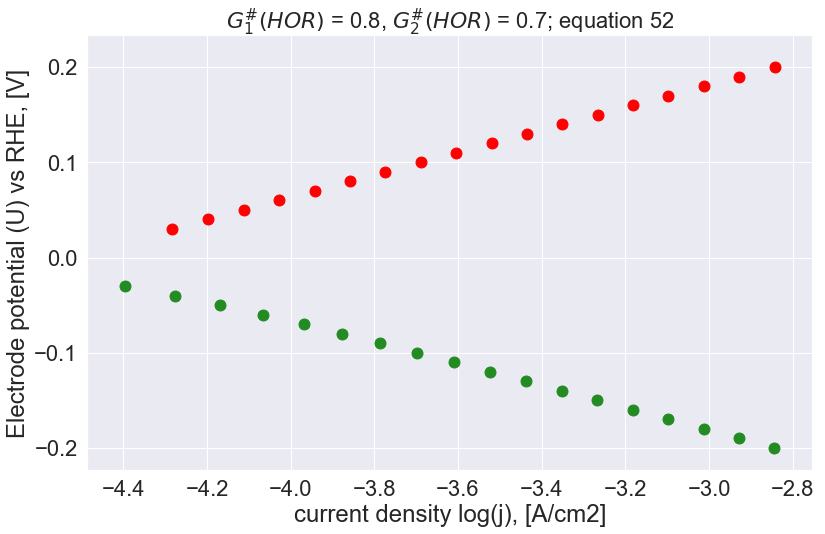

In [24]:
sns.set_style("darkgrid")
sns.set(font_scale=2)
plt.subplots(figsize=(13, 8))


plt.scatter(df1["log j_hor"],df2["U (V)"],color = "red",alpha = 1.0, s = 120)




# main HER plotting
plt.scatter(df1["log j_her"],-df2["U (V)"],color = "forestgreen", s = 120)


x = df1["G1_hash HOR (eV)"].unique()[0] 
y = df1["G2_hash HOR (eV)"].unique()[0]
plt.title(f"$G_1^\# (HOR)$ = {x}, $G_2^\# (HOR) $ = {y}; equation 52", fontsize = 22)
plt.ylabel('Electrode potential (U) vs RHE, [V]')
plt.xlabel('current density log(j), [A/cm2]')

Text(0.5, 0, 'current density log(j), [A/cm2]')

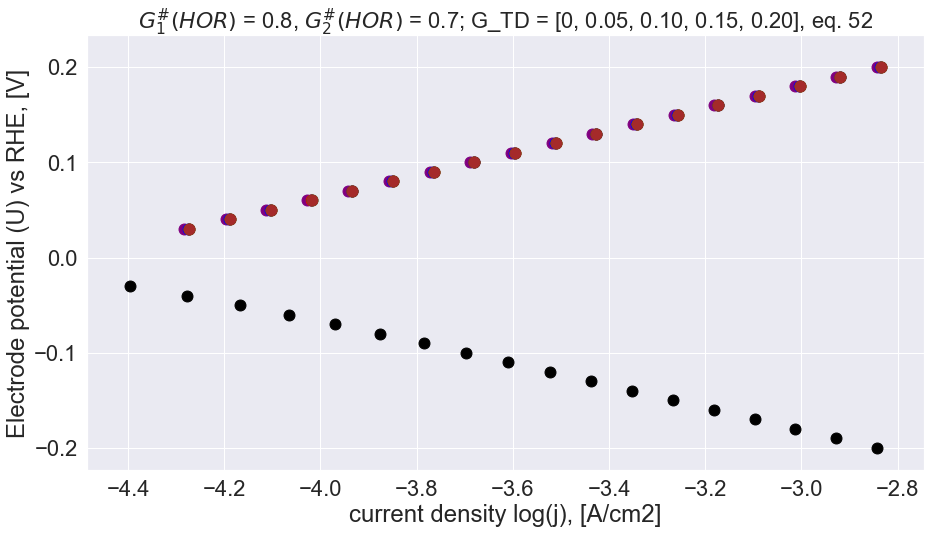

In [22]:
sns.set_style("darkgrid")
sns.set(font_scale=2)
plt.subplots(figsize=(15, 8))


plt.scatter(df1["log j_hor"],df1["U (V)"],color = "purple",alpha = 1.0, s = 120)
plt.scatter(df2["log j_hor"],df2["U (V)"],color = "blue",alpha = 1.0, s = 120)
plt.scatter(df3["log j_hor"],df3["U (V)"],color = "red",alpha = 1.0, s = 120)
plt.scatter(df4["log j_hor"],df4["U (V)"],color = "green",alpha = 1.0, s = 120)
plt.scatter(df5["log j_hor"],df5["U (V)"],color = "brown",alpha = 1.0, s = 120)



# =============================================================================
# =============================================================================


# main HER plotting
plt.scatter(df1["log j_her"],-df1["U (V)"],color = "black", s = 120, alpha = 1)
# plt.scatter(df2["log j_her"],-df2["U (V)"],color = "blue", s = 120, alpha = 0.10)
# plt.scatter(df3["log j_her"],-df3["U (V)"],color = "green", s = 120, alpha = 0.10)
# plt.scatter(df4["log j_her"],-df4["U (V)"],color = "purple", s = 120, alpha = 0.10)
# plt.scatter(df5["log j_her"],-df5["U (V)"],color = "pink", s = 120, alpha = 0.10)

"""
# evaluation of slode
m_her, c_her = np.polyfit(df1["log j_her"], -df1["U (V)"], 1)
yfit_her = [c_her + m_her * xi for xi in df1["log j_her"]]
plt.plot(df1["log j_her"],yfit_her, color = "black", alpha = 1.0, linewidth = 3)


plt.text(
    -3.2, -0.10, f"m={m_her*1000:.2f} mV/dec", ha="center", va="center", rotation=0, size=20,
    bbox=dict(boxstyle="square,pad=0.3", fc="white", ec="b", lw=2))
"""


nl = '\n'




""""
plt.text(
    -2, -0.0, "   $ {{\Delta G_{{\mathrm{TD}}}}} = 0 \:$ eV     ", ha="center", va="center", rotation=0, size=20, color ="purple",
    bbox=dict(boxstyle="square,pad=0.3", fc="white", ec="white", lw=2))

plt.text(
    -2, -0.03, " $ {{\Delta G_{{\mathrm{TD}}}}} = 0.05 \:$ eV ", ha="center", va="center", rotation=0, size=20, color ="blue",
    bbox=dict(boxstyle="square,pad=0.3", fc="white", ec="white", lw=2))
plt.text(
    -2, -0.06, " $ {{\Delta G_{{\mathrm{TD}}}}} = 0.10 \:$ eV ", ha="center", va="center", rotation=0, size=20, color ="red",
    bbox=dict(boxstyle="square,pad=0.3", fc="white", ec="white", lw=2))
plt.text(
    -2, -0.09, " $ {{  \Delta G_{{\mathrm{TD}}}}} = 0.15 \:$ eV ", ha="center", va="center", rotation=0, size=20, color ="green",
    bbox=dict(boxstyle="square,pad=0.3", fc="white", ec="white", lw=2))
plt.text(
    -2, -0.12, " $ {{\Delta G_{{\mathrm{TD}}}}} = 0.20 \:$ eV ", ha="center", va="center", rotation=0, size=20, color ="brown",
    bbox=dict(boxstyle="square,pad=0.3", fc="white", ec="white", lw=2))
"""





# General for graphics
# ====================
x = df1["G1_hash HOR (eV)"].unique()[0] 
y = df1["G2_hash HOR (eV)"].unique()[0]
plt.title(f"$G_1^\# (HOR)$ = {x}, $G_2^\# (HOR) $ = {y}; G_TD = [0, 0.05, 0.10, 0.15, 0.20], eq. 52", fontsize = 22)
plt.ylabel('Electrode potential (U) vs RHE, [V]')
plt.xlabel('current density log(j), [A/cm2]')
#plt.savefig("last.png",dpi = 1000)



### Rough

Text(0.5, 0, 'current density log(j), [A/cm2]')

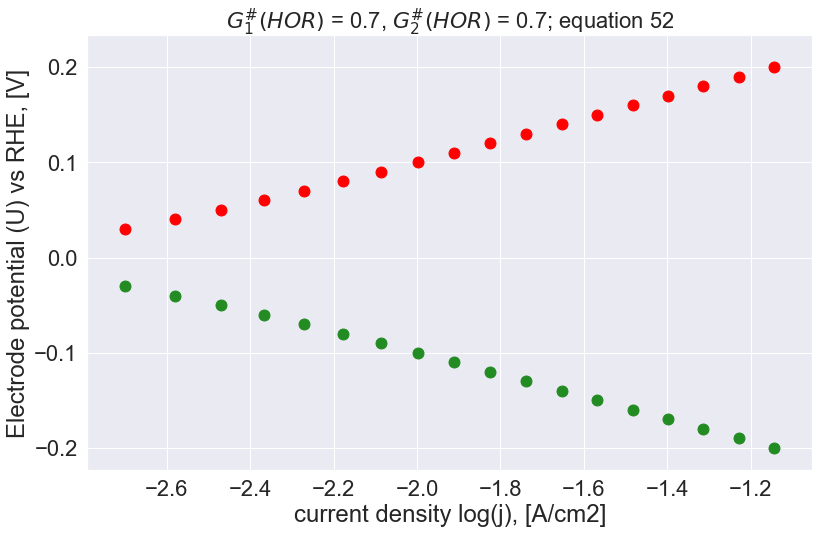

In [1328]:
sns.set_style("darkgrid")
sns.set(font_scale=2)
plt.subplots(figsize=(13, 8))


plt.scatter(df1["log j_hor"],df1["U (V)"],color = "red",alpha = 1.0, s = 120)




# main HER plotting
plt.scatter(df1["log j_her"],-df1["U (V)"],color = "forestgreen", s = 120)


x = df1["G1_hash HOR (eV)"].unique()[0] 
y = df1["G2_hash HOR (eV)"].unique()[0]
plt.title(f"$G_1^\# (HOR)$ = {x}, $G_2^\# (HOR) $ = {y}; equation 52", fontsize = 22)
plt.ylabel('Electrode potential (U) vs RHE, [V]')
plt.xlabel('current density log(j), [A/cm2]')